### **Data Collection**

In [1]:
# Load the dataset and necessary libraries
import pandas as pd
df = pd.read_excel('/content/muni-pop-housing.xlsx')

In [2]:
# Display the number of rows and columns
df.shape

(4999, 14)

In [3]:
# Display the first few rows of the DataFrame
df.head()

,Vintage 2023 prepared October 2024.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,YEAR,COUNTY,PLACE,CFIPS,PFIPS,Total Population,Household Population,Group Quarters Population,Household Size,Total Housing Units,Occupied Housing Units,Vacant Housing Units,Vacancy Percent,Household Population to Total Housing Units Ratio
1,2010,Las Animas County,Aguilar,71,760,534,534,0,2.49,269,214,55,20.34,1.98513
2,2010,Washington County,Akron,121,925,1651,1467,184,2.22,815,660,155,18.98,1.8
3,2010,Alamosa County,Alamosa,3,1090,8796,8124,672,2.37,3675,3433,242,6.59,2.210612
4,2010,Park County,Alma,93,1530,271,271,0,2.2,169,123,46,26.98,1.60355


Remove the incorrect header and correct it:

In [4]:
# Set the correct header row and reload the dataset
df.columns = df.iloc[0]  # set the first row as the header
df = df.drop(0).reset_index(drop=True)  # remove the old header row

In [5]:
# Show the first few rows
df.head()

,YEAR,COUNTY,PLACE,CFIPS,PFIPS,Total Population,Household Population,Group Quarters Population,Household Size,Total Housing Units,Occupied Housing Units,Vacant Housing Units,Vacancy Percent,Household Population to Total Housing Units Ratio
0,2010,Las Animas County,Aguilar,71,760,534,534,0,2.49,269,214,55,20.34,1.98513
1,2010,Washington County,Akron,121,925,1651,1467,184,2.22,815,660,155,18.98,1.8
2,2010,Alamosa County,Alamosa,3,1090,8796,8124,672,2.37,3675,3433,242,6.59,2.210612
3,2010,Park County,Alma,93,1530,271,271,0,2.2,169,123,46,26.98,1.60355
4,2010,Conejos County,Antonito,21,2355,783,782,1,2.46,375,318,57,15.23,2.085333


In [6]:
# Print the names of the columns
df.columns

Index(['YEAR', 'COUNTY', 'PLACE', 'CFIPS', 'PFIPS', 'Total Population',
       'Household Population', 'Group Quarters Population', 'Household Size',
       'Total Housing Units', 'Occupied Housing Units', 'Vacant Housing Units',
       'Vacancy Percent', 'Household Population to Total Housing Units Ratio'],
      dtype='object', name=0)

In [7]:
# Analyze the dataset to find unique counties and places
unique_counties = df['COUNTY'].nunique()
unique_places = df['PLACE'].nunique()

unique_counties, unique_places


(64, 334)

Understanding the distribution of the data:

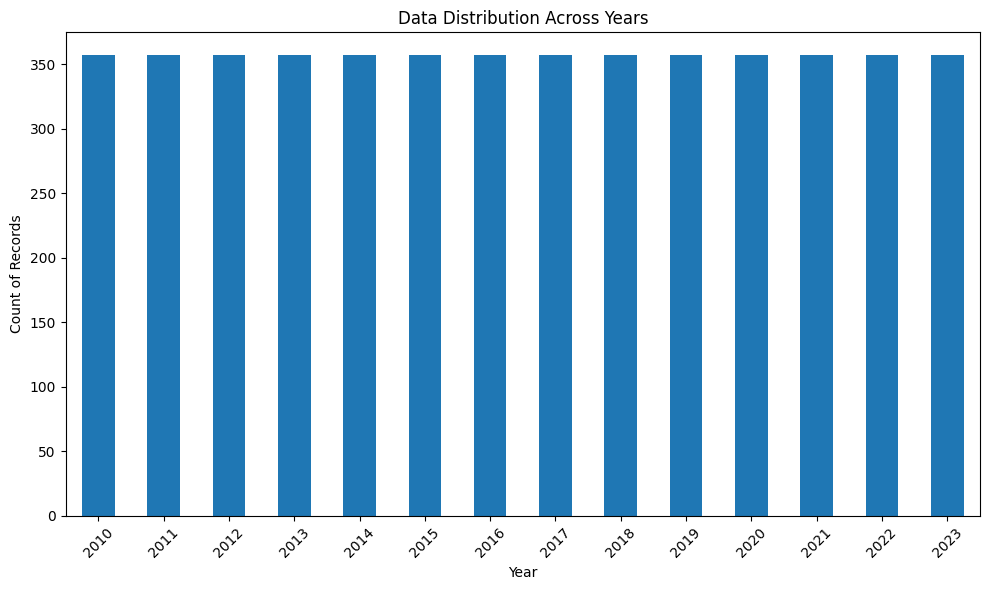

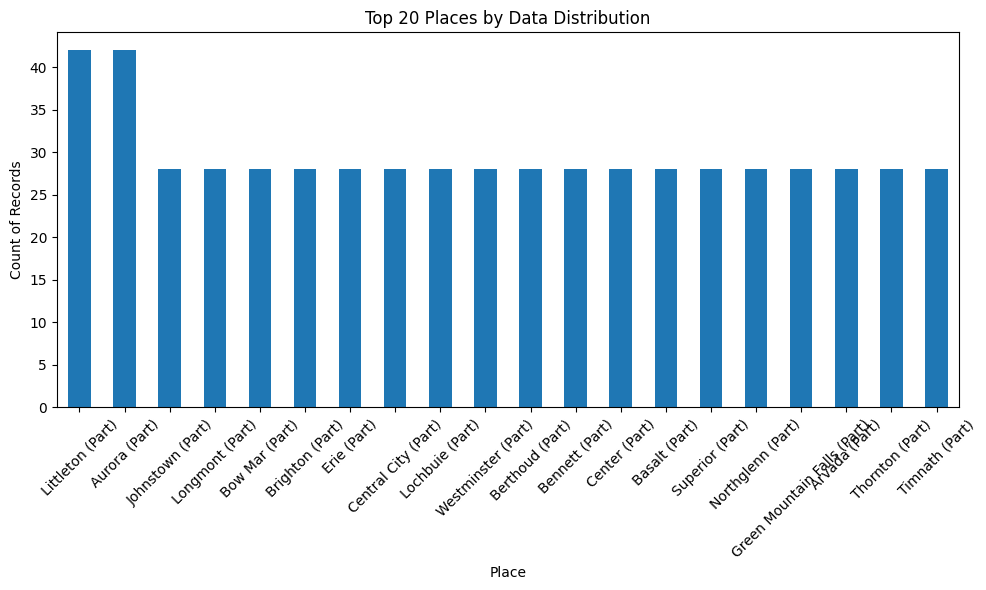

In [8]:
# Renaming columns for easier handling
df.columns = [
    "Year", "County", "Place", "CFIPS", "PFIPS", "Total_Population",
    "Household_Population", "Group_Quarters_Population", "Household_Size",
    "Total_Housing_Units", "Occupied_Housing_Units", "Vacant_Housing_Units",
    "Vacancy_Percent", "Population_to_Housing_Units_Ratio"
]

# Converting the 'Year' column to numeric for analysis
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Grouping data to check distribution across years and unique places
distribution = df.groupby(['Year', 'Place']).size().reset_index(name='Counts')

# Summarize the counts by year and place
yearly_distribution = df.groupby('Year').size()
place_distribution = df['Place'].value_counts()

# Plotting the distribution
import matplotlib.pyplot as plt

# Plot distribution of data across years
plt.figure(figsize=(10, 6))
yearly_distribution.plot(kind='bar')
plt.title('Data Distribution Across Years')
plt.xlabel('Year')
plt.ylabel('Count of Records')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot unique places and their occurrence
plt.figure(figsize=(10, 6))
place_distribution.head(20).plot(kind='bar')  # Display top 20 places for clarity
plt.title('Top 20 Places by Data Distribution')
plt.xlabel('Place')
plt.ylabel('Count of Records')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The first graph shows that the distribution across the years is constant. The second graph shows that Aurora (Part) and Littleton (Part) dominate the dataset with the highest record counts. This indicates significant representation. The remaining places show a fairly uniform distribution, reflecting balanced data across top locations.

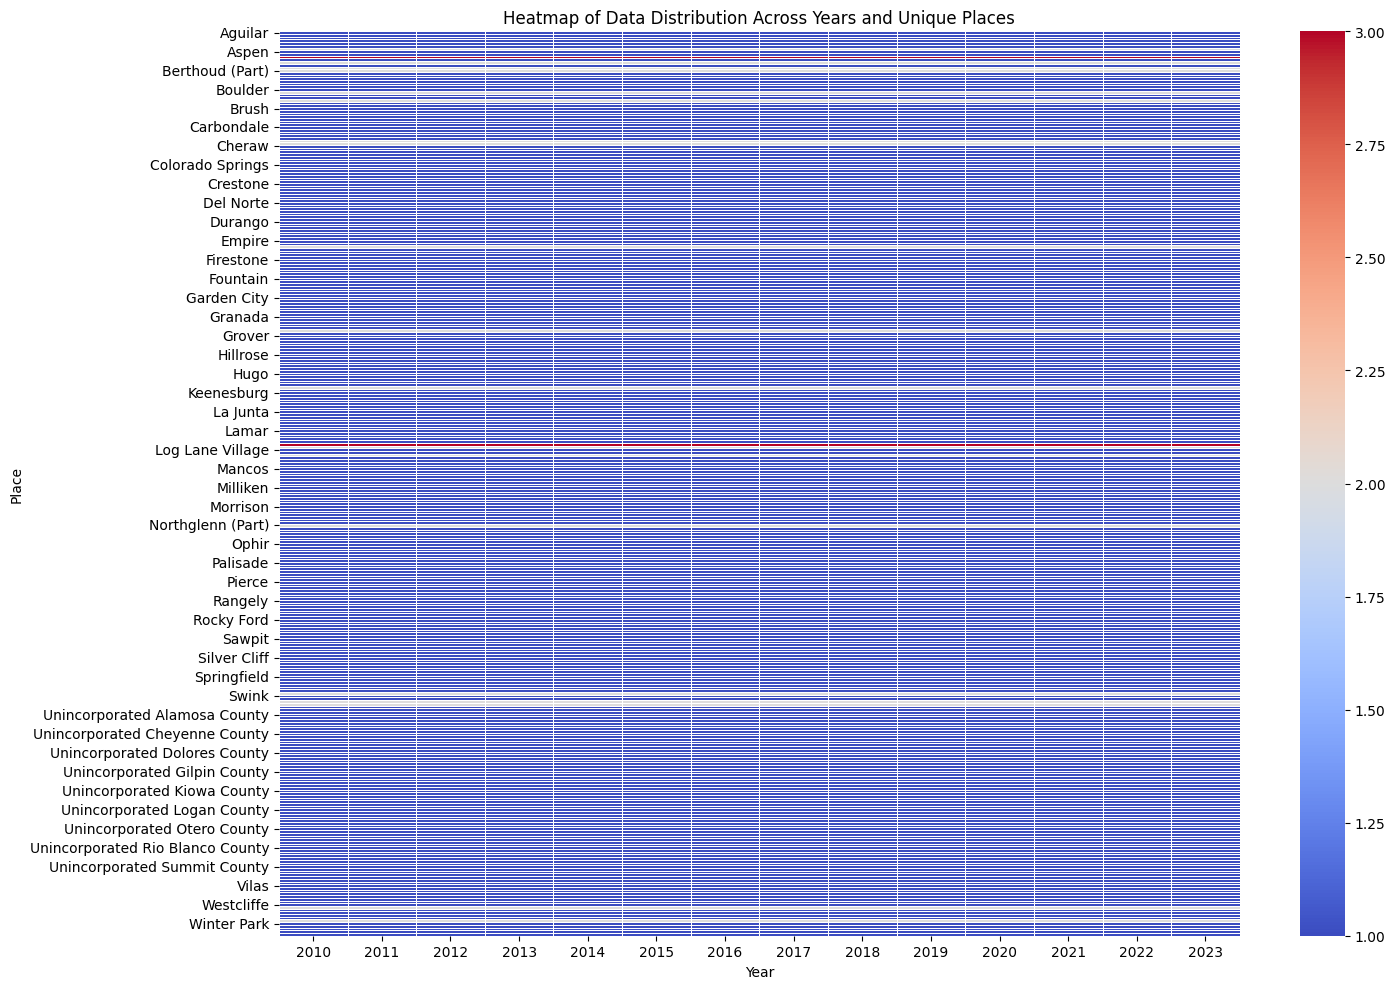

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group data by Year and Place and count occurrences
year_place_distribution = df.groupby(['Year', 'Place']).size().reset_index(name='Counts')

# Pivoting to create a heatmap-compatible format
heatmap_data = year_place_distribution.pivot(index='Place', columns='Year', values='Counts')

# Fill NaN values with 0 (places or years with no data)
heatmap_data = heatmap_data.fillna(0)

# Plotting the heatmap to visualize data distribution across years and places
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title('Heatmap of Data Distribution Across Years and Unique Places')
plt.xlabel('Year')
plt.ylabel('Place')
plt.tight_layout()
plt.show()

The heatmap shows the distribution of records across different places and years, with darker shades indicating higher counts. Log Lane Village stands out with consistently high activity, while most places have low and uniform data representation.

In [11]:
from scipy.stats import variation

# Calculate total counts per year and place
total_by_year = yearly_distribution.values
total_by_place = place_distribution.values

# Calculate Gini coefficient for both distributions
def gini(array):
    array = sorted(array)  # Sort array
    n = len(array)
    cumulative_values = sum((i + 1) * value for i, value in enumerate(array))
    return (2 * cumulative_values) / (n * sum(array)) - (n + 1) / n

gini_years = gini(total_by_year)
gini_places = gini(total_by_place)

# Calculate coefficient of variation (CV) as a measure of distribution spread
cv_years = variation(total_by_year)
cv_places = variation(total_by_place)

gini_years, cv_years, gini_places, cv_places


(0.0, 0.0, 0.06069373857327376, 0.25808338763053135)

**Yearly Bias:** Negligible, as the Gini coefficient and CV are both zero, indicating an even distribution.

**Place Bias:** Minimal, with a low Gini coefficient and a CV showing moderate variability, but not excessive.

**Actual Numbers in Colorado:**

**Counties:** Colorado has 64 counties (source: Wikipedia).

**Places:** The U.S. Census Bureau recognizes 458 places, including municipalities and census-designated places (source: U.S. Census Bureau).

**Counties Covered:** 64/64 = 100% coverage.

**Places Covered:** 334/458 = 73% coverage.

**Missing Places:** 124 places (27%) are not covered, representing a gap in geographic representation.

### **Conclusion:**

This analysis highlights trends in data distribution across places and years, with a focus on the 73% of the dataset where records are consistently represented. By restricting the analysis to this subset, the findings are limited to these areas, ensuring that conclusions are derived from well-represented data. Additionally, statistical weights will be applied to overrepresented places to balance their influence, mitigating potential bias and ensuring the results reflect a fairer distribution of the dataset's characteristics. This approach ensures that insights are robust and representative of the dataset's true trends.

## **Data Processing**

Convert numerical columns to appropriate types:

In [12]:
# Convert numerical columns to appropriate types
numeric_columns = ['Year', 'CFIPS', 'PFIPS', 'Total_Population', 'Household_Population',
                   'Group_Quarters_Population', 'Household_Size', 'Total_Housing_Units',
                   'Occupied_Housing_Units', 'Vacant_Housing_Units', 'Vacancy_Percent',
                   'Population_to_Housing_Units_Ratio']

# Convert to numeric types and handle conversion errors
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

Check for missing and duplicate values:

In [13]:
# Check the result and see if there are missing values or duplicates
df.isnull().sum()

,0
Year,0
County,0
Place,0
CFIPS,0
PFIPS,0
Total_Population,0
Household_Population,0
Group_Quarters_Population,0
Household_Size,0
Total_Housing_Units,0


In [14]:
df.duplicated().sum()

0

Therer are no duplicate values.

Drop irrelevent columns:


In [15]:
# Drop irrelevant columns
irrelevant_columns = ['CFIPS', 'PFIPS']
df = df.drop(columns=irrelevant_columns, errors='ignore')

df.head()

,Year,County,Place,Total_Population,Household_Population,Group_Quarters_Population,Household_Size,Total_Housing_Units,Occupied_Housing_Units,Vacant_Housing_Units,Vacancy_Percent,Population_to_Housing_Units_Ratio
0,2010,Las Animas County,Aguilar,534,534,0,2.49,269,214.0,55.0,20.34,1.985130
1,2010,Washington County,Akron,1651,1467,184,2.22,815,660.0,155.0,18.98,1.800000
2,2010,Alamosa County,Alamosa,8796,8124,672,2.37,3675,3433.0,242.0,6.59,2.210612
3,2010,Park County,Alma,271,271,0,2.20,169,123.0,46.0,26.98,1.603550
4,2010,Conejos County,Antonito,783,782,1,2.46,375,318.0,57.0,15.23,2.085333


### **Handling Outliers:**

**Why IQR Is Not Efficient Here**:

**Wide Ranges:** Population and housing-related metrics often have naturally wide distributions. The IQR method flags a large number of legitimate values as outliers, which is not be desirable.

Using **Z-scores** instead allows us to standardize the data, making it scale-independent and better suited for detecting statistical anomalies.

**Advantages of Z-Scores:**

Handles wide-ranging and skewed data better than IQR.
Standardizes all columns, making it scale-independent.

In [16]:
from scipy.stats import zscore

# Select numeric columns for outlier detection
numeric_columns = [
    'Total_Population', 'Household_Population', 'Household_Size', 'Group_Quarters_Population',
    'Total_Housing_Units', 'Occupied_Housing_Units', 'Vacant_Housing_Units', 'Population_to_Housing_Units_Ratio', 'Vacancy_Percent'
]

# Calculate Z-scores
z_scores = df[numeric_columns].apply(zscore, nan_policy='omit')

# Identify outliers (Z-score > 3 or < -3)
z_outliers = (z_scores.abs() > 3)

# Count outliers for each column
outliers_count = z_outliers.sum(axis=0)

# Display outliers count and the cleaned dataset
print("Outliers count per column:")
print(outliers_count)

Outliers count per column:
Total_Population                      78
Household_Population                  77
Household_Size                        73
Group_Quarters_Population             92
Total_Housing_Units                   59
Occupied_Housing_Units                60
Vacant_Housing_Units                  68
Population_to_Housing_Units_Ratio     57
Vacancy_Percent                      116
dtype: int64


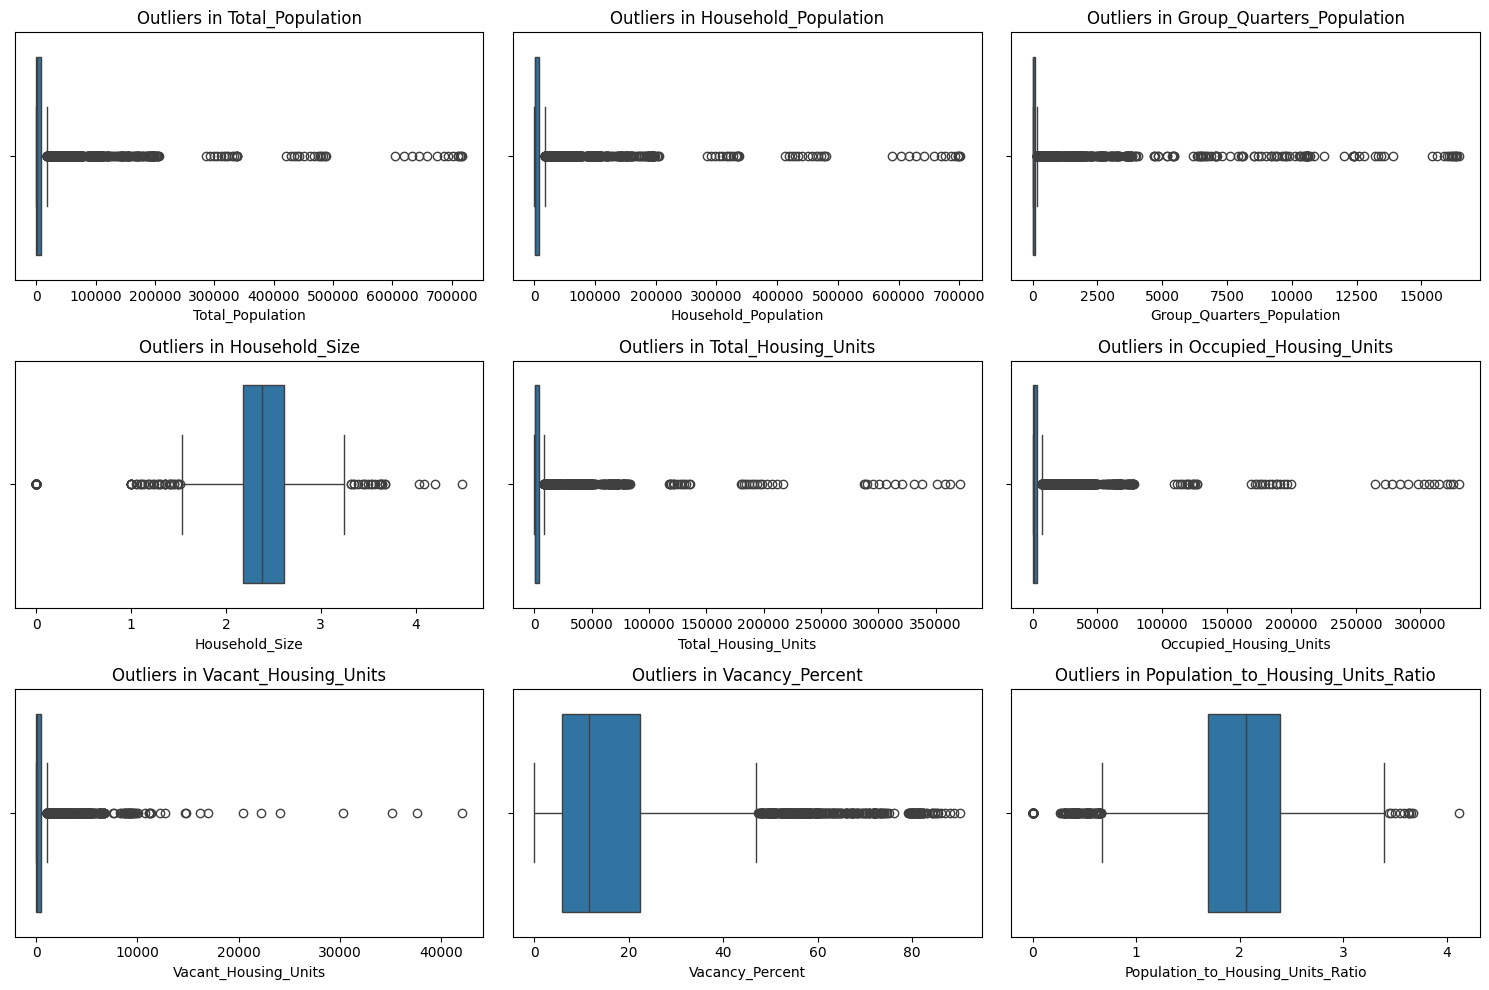

In [17]:
# Visualizing the outliers

# Creating boxplots for numeric columns
plt.figure(figsize=(15, 10))
numeric_columns_to_plot = [
    'Total_Population', 'Household_Population', 'Group_Quarters_Population',
    'Household_Size', 'Total_Housing_Units', 'Occupied_Housing_Units',
    'Vacant_Housing_Units', 'Vacancy_Percent',
    'Population_to_Housing_Units_Ratio'
]

for i, column in enumerate(numeric_columns_to_plot):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[column], orient='h')
    plt.title(f"Outliers in {column}")

plt.tight_layout()
plt.show()

**Understandings from the visualization:**

1. **Outliers in Total Population:** The distribution shows a dense cluster at lower values, with significant outliers in higher population ranges, likely representing urban areas.

2. **Outliers in Household Population:** Similar to Total Population, high outliers suggest places with disproportionately large household populations.

3. **Outliers in Group Quarters Population:** Most values are concentrated near zero, but extreme outliers indicate a few areas with large institutional populations.

4. **Outliers in Household Size:** Household size is mostly consistent, but a few places deviate significantly with either very small or very large households.

5. **Outliers in Total Housing Units:** While most places have moderate housing counts, outliers with significantly higher values suggest regions with expansive housing infrastructure.

6. **Outliers in Occupied Housing Units:** The distribution mirrors Total Housing Units, with high outliers indicating densely populated or high-demand housing areas.

7. **Outliers in Vacant Housing Units:** Most places have low vacancy, but extreme outliers highlight areas with unusually high numbers of vacant units.

8. **Outliers in Vacancy Percent:** Vacancy rates are mostly below 20%, but outliers suggest places with exceptionally high vacancy percentages, possibly rural or distressed areas.

9. **Outliers in Population to Housing Units Ratio:** Ratios are mostly centered around 2, with outliers indicating areas with either very high or low housing availability relative to the population.

The **Winsorization process** can be applied to reduce the impact of extreme outliers in the dataset while preserving all data points.

Winsorization caps the extreme values in each column to the 1st and 99th percentiles, adjusting outliers to fall within this range. This approach maintains the dataset’s integrity, ensuring that outliers do not disproportionately influence analysis, while retaining all data for comprehensive insights.

In [18]:
from scipy.stats.mstats import winsorize

# Ensuring numeric columns are properly formatted for Winsorization
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Applying Winsorization to the updated numeric columns
df_winsorized = df.copy()
for column in numeric_columns:
    df_winsorized[column] = winsorize(df[column], limits=(0.01, 0.01))

# Display the first few rows of the Winsorized dataset
df_winsorized.head()


,Year,County,Place,Total_Population,Household_Population,Group_Quarters_Population,Household_Size,Total_Housing_Units,Occupied_Housing_Units,Vacant_Housing_Units,Vacancy_Percent,Population_to_Housing_Units_Ratio
0,2010,Las Animas County,Aguilar,534,534,0,2.49,269,214.0,55.0,20.34,1.985130
1,2010,Washington County,Akron,1651,1467,184,2.22,815,660.0,155.0,18.98,1.800000
2,2010,Alamosa County,Alamosa,8796,8124,672,2.37,3675,3433.0,242.0,6.59,2.210612
3,2010,Park County,Alma,271,271,0,2.20,169,123.0,46.0,26.98,1.603550
4,2010,Conejos County,Antonito,783,782,1,2.46,375,318.0,57.0,15.23,2.085333


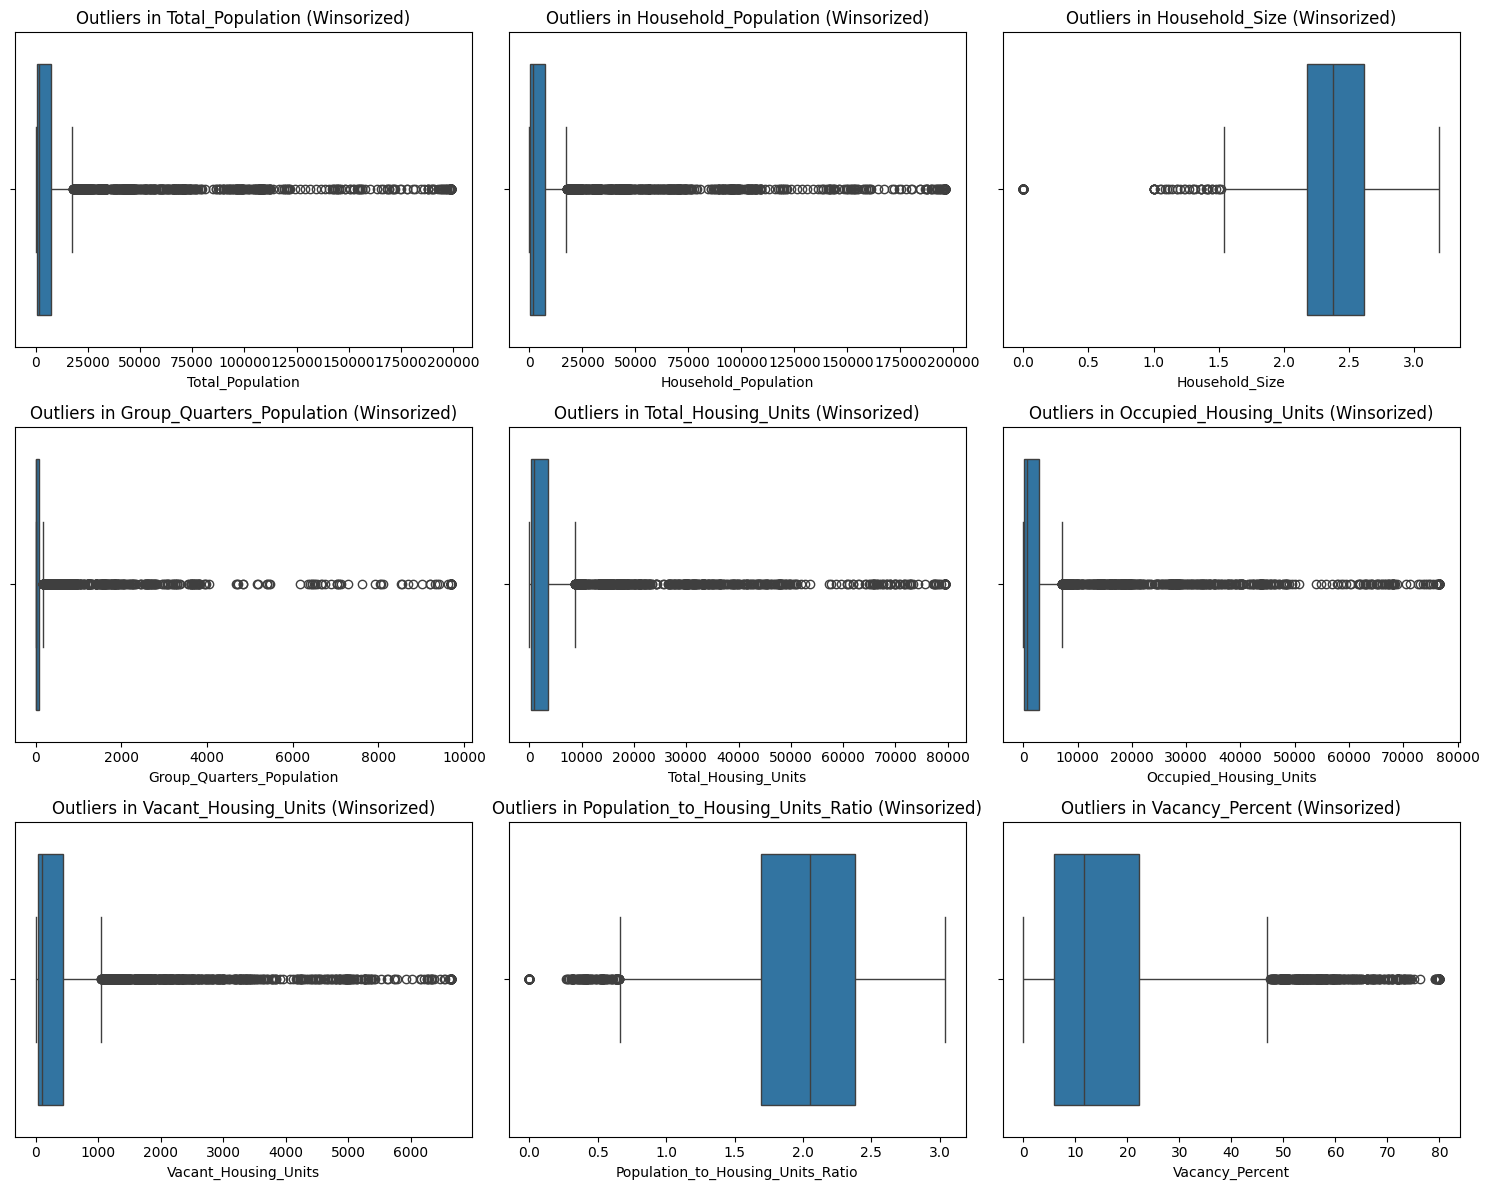

In [19]:
# Visualizing the Winsorized data with boxplots to check for remaining outliers
plt.figure(figsize=(15, 12))

for i, column in enumerate(numeric_columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df_winsorized[column], orient='h')
    plt.title(f"Outliers in {column} (Winsorized)")

plt.tight_layout()
plt.show()

The boxplots show that Winsorization effectively reduced extreme outliers, particularly in metrics like **Total Population**, **Group Quarters Population**, and **Vacant Housing Units**, capping values within a more reasonable range.

Columns such as **Household Size** and **Population to Housing Units Ratio** exhibit compact distributions with minimal changes. While some residual variability remains in columns like **Vacancy Percent** and **Total Housing Units**, the majority of data points are now concentrated within the boxplots, ensuring a more balanced dataset suitable for analysis.

### **Checking Data Quality:**



In [20]:
import numpy as np
import pandas as pd

# Step 1: Replace any NaN values with a placeholder (e.g., 0)
df_winsorized = df_winsorized.fillna(0)

# Step 2: Identify missing values
missing_values = df_winsorized.isnull().sum()

# Step 3: Identify duplicate rows
duplicate_rows = df_winsorized.duplicated().sum()

# Step 4: Compute summary statistics
summary_stats = df_winsorized.describe()

# Step 5: Combine results into a data quality report
data_quality_report = pd.DataFrame({
    "Missing Values": missing_values,
    "Duplicate Rows": [duplicate_rows] * (missing_values)  # Align with DataFrame structure
})

# Display the data quality report
print("Data Quality Check Report:")
print(data_quality_report)

# Display summary statistics
print("\nSummary Statistics for Numeric Columns:")
print(summary_stats)

Data Quality Check Report:
                                   Missing Values  Duplicate Rows
Year                                            0               0
County                                          0               0
Place                                           0               0
Total_Population                                0               0
Household_Population                            0               0
Group_Quarters_Population                       0               0
Household_Size                                  0               0
Total_Housing_Units                             0               0
Occupied_Housing_Units                          0               0
Vacant_Housing_Units                            0               0
Vacancy_Percent                                 0               0
Population_to_Housing_Units_Ratio               0               0

Summary Statistics for Numeric Columns:
              Year  Total_Population  Household_Population  \
count  4998.

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

The data quality report shows that the dataset has no missing values or duplicate rows, ensuring completeness and uniqueness.

The numeric columns have reasonable distributions, with metrics like **Total Population** and **Vacancy Percent** showing high variability due to differences across places.

Key statistics, such as mean and median, indicate typical values, while extreme ranges (e.g., **Total Housing Units** and **Occupied Housing Units**) highlight diversity in the data.

Overall, the dataset is clean, well-structured, and ready for analysis.

### **Understanding Data:**

Identifying Attribute Types:



In [21]:
# Identifying attribute types in the dataset
attribute_types = {
    "Categorical": [],
    "Numerical": [],
    "Other": []
}

# Classifying columns based on their data type and usage
for column in df_winsorized.columns:
    if df_winsorized[column].dtype in ['int64', 'float64']:
        attribute_types["Numerical"].append(column)
    elif df_winsorized[column].dtype == 'object':
        attribute_types["Categorical"].append(column)
    else:
        attribute_types["Other"].append(column)

# Displaying the identified attribute types
attribute_types

{'Categorical': ['County', 'Place'],
 'Numerical': ['Year',
  'Total_Population',
  'Household_Population',
  'Group_Quarters_Population',
  'Household_Size',
  'Total_Housing_Units',
  'Occupied_Housing_Units',
  'Vacant_Housing_Units',
  'Vacancy_Percent',
  'Population_to_Housing_Units_Ratio'],
 'Other': []}

Calculating Central Tendency:

In [22]:
# Calculating measures of central tendency (mean, median, mode) for numerical columns
central_tendency = pd.DataFrame({
    "Mean": df_winsorized[numeric_columns].mean(),
    "Median": df_winsorized[numeric_columns].median(),
    "Mode": df_winsorized[numeric_columns].mode().iloc[0]
})

# Displaying central tendency measures
print("Central Tendency Measures:")
print(central_tendency)

Central Tendency Measures:
                                           Mean       Median  Mode
Total_Population                   13049.543217  1724.000000  0.00
Household_Population               12757.355342  1587.500000  0.00
Household_Size                         2.386313     2.380000  2.47
Group_Quarters_Population            315.614646     0.000000  0.00
Total_Housing_Units                 5545.347739   855.000000  0.00
Occupied_Housing_Units              5018.089036   666.000000  0.00
Vacant_Housing_Units                 547.039016   102.000000  0.00
Population_to_Housing_Units_Ratio      1.994189     2.054949  0.00
Vacancy_Percent                       17.182381    11.645000  0.00


The dataset shows that most metrics, like Total Population and Total Housing Units, have high averages (mean), but their medians are much lower, indicating skewed data with a few large values pulling up the mean.

The mode (most frequent value) for many columns is 0, suggesting many areas have minimal or no data for certain metrics, like Group Quarters Population or Vacant Housing Units.

For ratios like Household Size and Population to Housing Units Ratio, the values are more consistent, with means and medians closely aligned. This highlights a mix of sparse and concentrated regions in the dataset.

Calculating the dispersion metrics:

In [23]:
# Calculating measures of dispersion (standard deviation, variance, range, and interquartile range) for numerical columns

# Calculate standard deviation and variance
std_dev = df_winsorized[numeric_columns].std()
variance = df_winsorized[numeric_columns].var()

# Calculate range
data_range = df_winsorized[numeric_columns].max() - df_winsorized[numeric_columns].min()

# Calculate interquartile range (IQR)
q1 = df_winsorized[numeric_columns].quantile(0.25)
q3 = df_winsorized[numeric_columns].quantile(0.75)
iqr = q3 - q1

# Combine dispersion metrics into a DataFrame
dispersion_metrics = pd.DataFrame({
    "Standard Deviation": std_dev,
    "Variance": variance,
    "Range": data_range,
    "Interquartile Range (IQR)": iqr
})

# Displaying the dispersion metrics
print("Dispersion Metrics:")
print(dispersion_metrics)

Dispersion Metrics:
                                   Standard Deviation      Variance  \
Total_Population                         33058.575635  1.092869e+09   
Household_Population                     32364.020562  1.047430e+09   
Household_Size                               0.418771  1.753695e-01   
Group_Quarters_Population                 1251.479172  1.566200e+06   
Total_Housing_Units                      13192.568639  1.740439e+08   
Occupied_Housing_Units                   12612.626128  1.590783e+08   
Vacant_Housing_Units                      1138.360144  1.295864e+06   
Population_to_Housing_Units_Ratio            0.596660  3.560034e-01   
Vacancy_Percent                             16.448101  2.705400e+02   

                                       Range  Interquartile Range (IQR)  
Total_Population                   199091.00                6893.500000  
Household_Population               196126.00                6786.750000  
Household_Size                          3.19   

The dispersion metrics reveal significant variability in the dataset. Columns like Total Population and Total Housing Units have high standard deviations and ranges, reflecting large differences across regions.

The interquartile range (IQR) for these columns shows that most data falls within a narrower range, despite the presence of extreme values. Metrics like Group Quarters Population and Household Size have much smaller variability, indicating more consistency across the dataset.

These measures highlight the diverse nature of the data, with some metrics showing concentrated distributions and others exhibiting wide spreads.

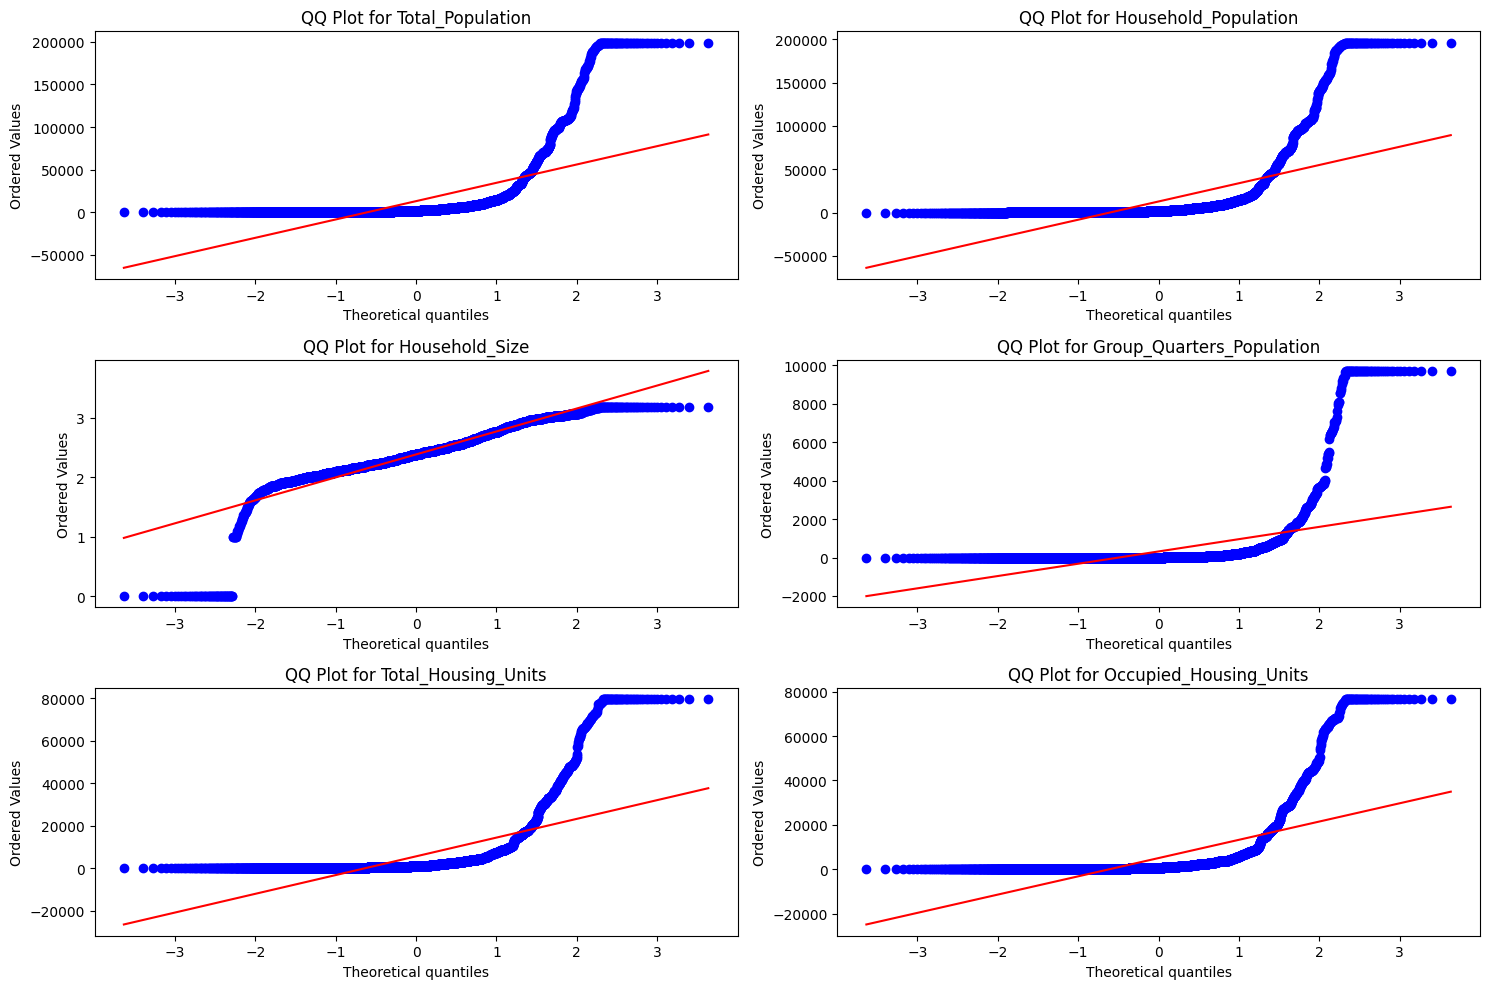

In [24]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Generating QQ plots for selected numerical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns[:6]):  # Limiting to the first 6 for clarity
    plt.subplot(3, 2, i + 1)
    stats.probplot(df_winsorized[column], dist="norm", plot=plt)
    plt.title(f"QQ Plot for {column}")

plt.tight_layout()
plt.show()

While some metrics (like Household Size) are nearly normal, others (like Total Population and Vacant Housing Units) exhibit skewness or heavy tails, making them less suited for analyses that assume normality.

Transformations (log transformation) can be applied to address these deviations.

### **Applying Transformation:**

In [25]:
# Applying transformations to address skewness
# Log transformations for highly skewed columns

import numpy as np

columns_to_transform = [
    'Total_Population', 'Household_Population', 'Household_Size', 'Group_Quarters_Population',
    'Total_Housing_Units', 'Occupied_Housing_Units', 'Vacant_Housing_Units', 'Population_to_Housing_Units_Ratio', 'Vacancy_Percent'
]

# Applying log transformation to selected columns (adding 1 to avoid log(0))
df_transformed = df_winsorized.copy()
for column in columns_to_transform:
    df_transformed[column] = df_transformed[column].apply(lambda x: np.log1p(x) if x > 0 else 0)

# Checking the results of transformations with summary statistics
transformed_stats = df_transformed[columns_to_transform].describe()

# Displaying the summary statistics of the transformed data directly
print("Summary Statistics of Transformed Data:")
print(transformed_stats)

Summary Statistics of Transformed Data:
       Total_Population  Household_Population  Household_Size  \
count       4998.000000           4998.000000     4998.000000   
mean           7.493546              7.471775        1.209105   
std            2.182089              2.175791        0.162369   
min            0.000000              0.000000        0.000000   
25%            6.159095              6.129050        1.156881   
50%            7.452982              7.370545        1.217876   
75%            8.904697              8.888170        1.285782   
max           12.201522             12.186518        1.432701   

       Group_Quarters_Population  Total_Housing_Units  Occupied_Housing_Units  \
count                4998.000000          4998.000000             4998.000000   
mean                    2.173155             6.830900                6.613111   
std                     2.661898             2.060137                2.092410   
min                     0.000000             0.000

The log transformations effectively reduced the skewness in the dataset, bringing extreme values closer to the central range. Metrics like **Total Population** and **Housing Units** now exhibit a more compact distribution, with reduced variability and better alignment between mean and median. Columns with previously significant outliers, such as **Vacant Housing Units** and **Vacancy Percent**, now fall within a manageable range. This transformation makes the dataset more suitable for analysis by addressing skewness and ensuring a more balanced distribution.

### **Applying Min-Max Normalization:**

In [26]:
from sklearn.preprocessing import MinMaxScaler

# Applying Min-Max Normalization to the transformed data
scaler = MinMaxScaler()

# Normalizing the transformed numerical columns
df_normalized = df_transformed.copy()
df_normalized[numeric_columns] = scaler.fit_transform(df_transformed[numeric_columns])

# Checking the normalized data
normalized_stats = df_normalized[numeric_columns].describe()

# Displaying the summary statistics for the normalized data
print("Summary Statistics of Normalized Data:")
print(normalized_stats)

Summary Statistics of Normalized Data:
       Total_Population  Household_Population  Household_Size  \
count       4998.000000           4998.000000     4998.000000   
mean           0.614148              0.613118        0.843934   
std            0.178837              0.178541        0.113331   
min            0.000000              0.000000        0.000000   
25%            0.504781              0.502937        0.807483   
50%            0.610824              0.604811        0.850056   
75%            0.729802              0.729345        0.897454   
max            1.000000              1.000000        1.000000   

       Group_Quarters_Population  Total_Housing_Units  Occupied_Housing_Units  \
count                4998.000000          4998.000000             4998.000000   
mean                    0.236717             0.605383                0.588042   
std                     0.289955             0.182578                0.186058   
min                     0.000000             0.0000

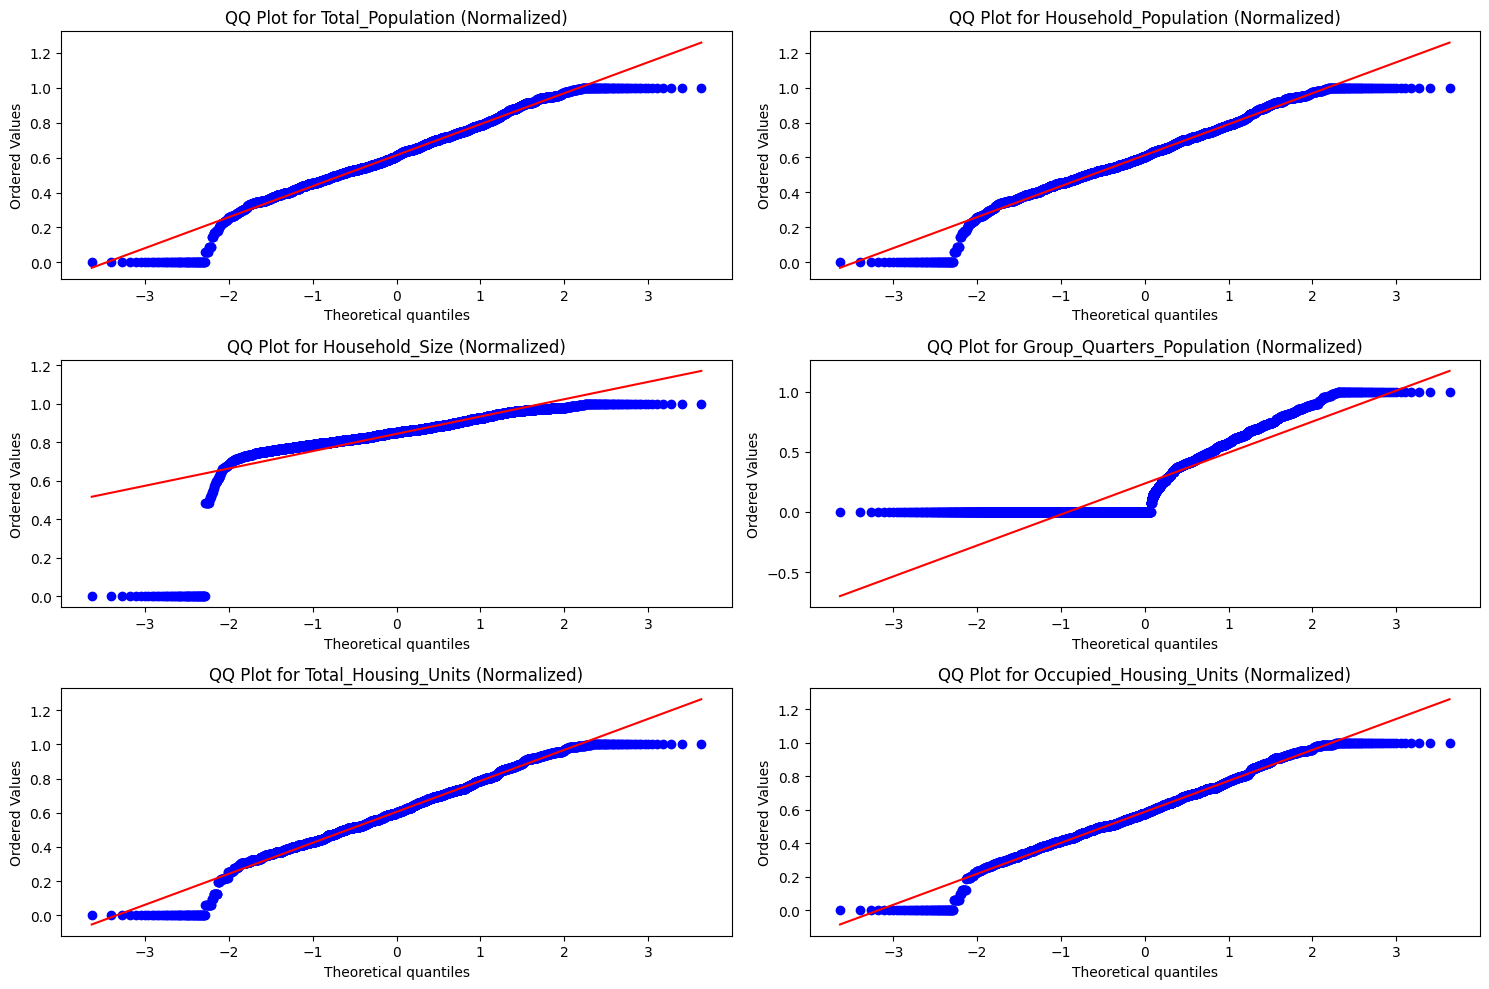

In [27]:
# Generating QQ plots for normalized data to assess its distribution
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns[:6]):  # Limiting to the first 6 columns for clarity
    plt.subplot(3, 2, i + 1)
    stats.probplot(df_normalized[column], dist="norm", plot=plt)
    plt.title(f"QQ Plot for {column} (Normalized)")

plt.tight_layout()
plt.show()

The QQ plots for the normalized data show significant improvement in alignment with the diagonal line, particularly for metrics like **Total Population**, **Household Population**, and **Total Housing Units**, indicating reduced skewness and a closer approximation to normality.

While slight deviations remain at the tails for metrics like **Group Quarters Population** and **Household Size**, the overall distribution is more consistent, making the dataset suitable for analyses requiring normality.

### **Conclusion:**

The dataset has been thoroughly prepared for analysis, addressing variability and skewness through log transformations and normalizing all numerical columns using Min-Max scaling to a range of [0, 1].

This process reduced the impact of extreme values, particularly in columns like **Total Population**, **Vacancy Percent**, and **Housing Units**, ensuring a more compact and balanced distribution. The dataset is now clean, consistent, and suitable for deeper insights.

### **Visualizations**

In [28]:
# Download the clean dataset for further analysis
file_name = "clean_dataset.xlsx"
df_normalized.to_excel(file_name, index=False)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63],
 [Text(0, 0, 'Las Animas County'),
  Text(1, 0, 'Washington County'),
  Text(2, 0, 'Alamosa County'),
  Text(3, 0, 'Park County'),
  Text(4, 0, 'Conejos County'),
  Text(5, 0, 'Lincoln County'),
  Text(6, 0, 'Adams County'),
  Text(7, 0, 'Jefferson County'),
  Text(8, 0, 'Pitkin County'),
  Text(9, 0, 'Weld County'),
  Text(10, 0, 'Arapahoe County'),
  Text(11, 0, 'Douglas County'),
  Text(12, 0, 'Eagle County'),
  Text(13, 0, 'La Plata County'),
  Text(14, 0, 'Larimer County'),
  Text(15, 0, 'Kit Carson County'),
  Text(16, 0, 'Gilpin County'),
  Text(17, 0, 'Costilla County'),
  Text(18, 0, 'Summit County'),
  Text(

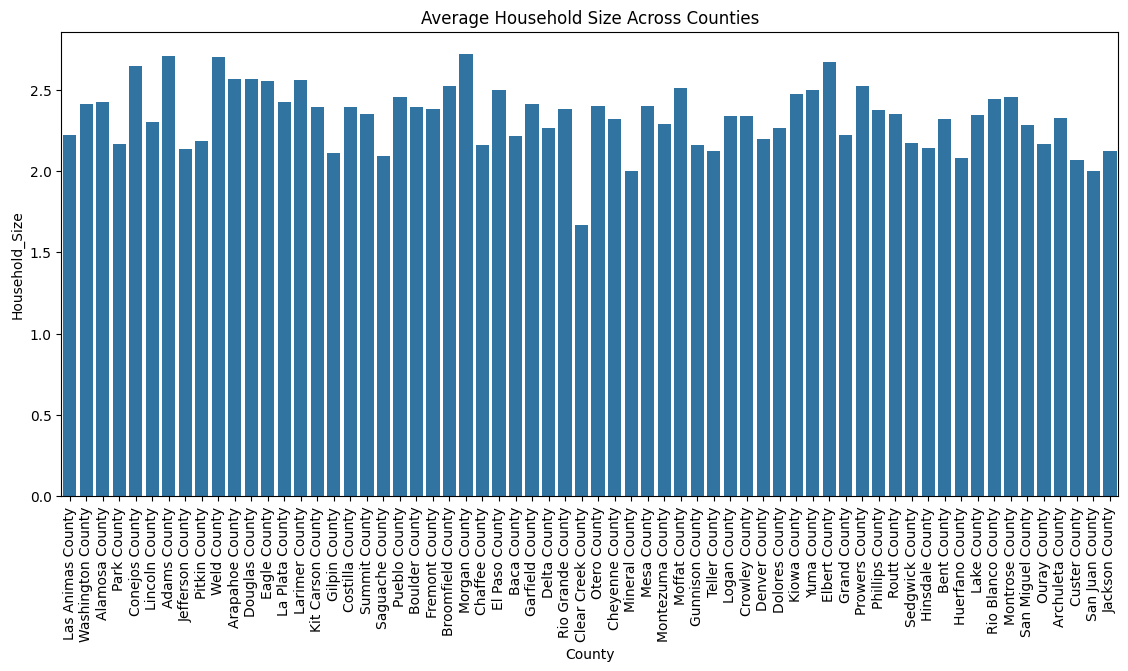

In [29]:
plt.figure(figsize=(30, 35))

# 1. Average household size across all counties and places (Bar Plot)
plt.subplot(5, 2, 1)
sns.barplot(x='County', y='Household_Size', data=df, errorbar=None)
plt.title("Average Household Size Across Counties")
plt.xticks(rotation=90)

This bar plot shows variations in household sizes across counties. Some counties exhibit consistently larger household sizes, indicating family-oriented communities, while others have smaller sizes, suggesting different demographics or housing trends. Counties such as Adams, Weld, and Morgan have some of the largest household sizes while, Clear Creek and Mineral County have smaller household sizes.

<ipython-input-30-08326dd5f360>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_counties, y=top_counties.index, palette='viridis')


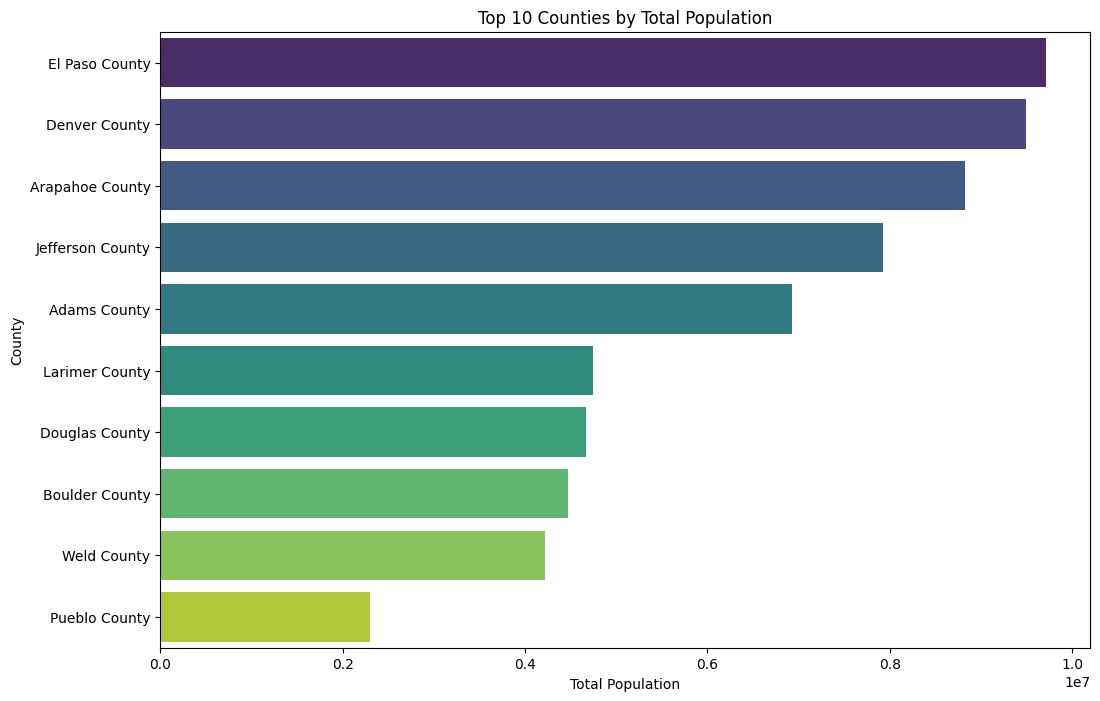

In [30]:
# 2. County with the highest total population (Horizontal Bar Plot)
plt.figure(figsize=(12, 8))

# Grouping by county and summing total population
county_population = df.groupby('County')['Total_Population'].sum().sort_values(ascending=False)

# Selecting the top 10 counties by total population
top_counties = county_population.head(10)

# Creating the horizontal bar plot
sns.barplot(x=top_counties, y=top_counties.index, palette='viridis')
plt.title("Top 10 Counties by Total Population")
plt.xlabel("Total Population")
plt.ylabel("County")
plt.show()

The bar plot shows that **El Paso County** has the largest population, followed by **Denver County**, making them the most populated areas. **Arapahoe**, **Jefferson**, and **Adams Counties** also have high populations, reflecting their suburban and urban development. **Pueblo County** is the smallest among the top 10, indicating it is less urbanized. Overall, the chart highlights population concentration in key urban and suburban counties.

Text(0.5, 1.0, 'Correlation Between Total Housing Units and Total Population')

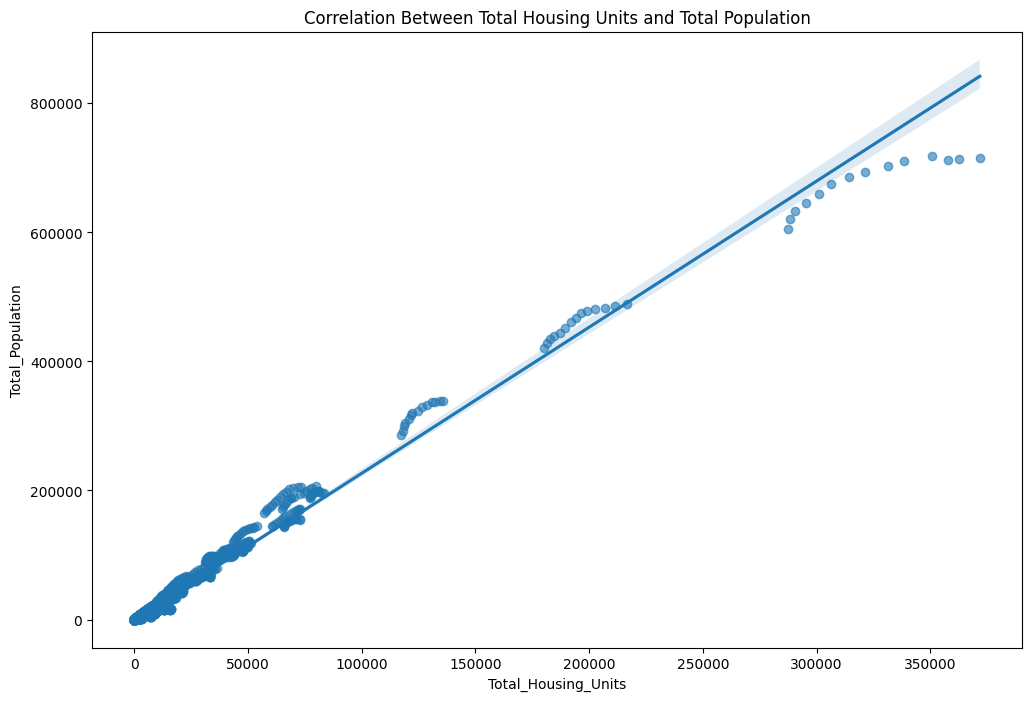

In [31]:
# 3. Correlation between total housing units and total population (Scatter Plot with Regression Line)
plt.figure(figsize=(12, 8))
sns.regplot(x='Total_Housing_Units', y='Total_Population', data=df, scatter_kws={'alpha':0.6})
plt.title("Correlation Between Total Housing Units and Total Population")

The scatterplot shows a strong positive correlation between **Total Housing Units** and **Total Population**, indicating that areas with more housing units tend to have larger populations. Most data points align closely with the regression line, reflecting a consistent trend, while a few higher values represent large urban centers like Denver. This relationship emphasizes the importance of housing availability in population growth.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63],
 [Text(0, 0, 'Las Animas County'),
  Text(1, 0, 'Washington County'),
  Text(2, 0, 'Alamosa County'),
  Text(3, 0, 'Park County'),
  Text(4, 0, 'Conejos County'),
  Text(5, 0, 'Lincoln County'),
  Text(6, 0, 'Adams County'),
  Text(7, 0, 'Jefferson County'),
  Text(8, 0, 'Pitkin County'),
  Text(9, 0, 'Weld County'),
  Text(10, 0, 'Arapahoe County'),
  Text(11, 0, 'Douglas County'),
  Text(12, 0, 'Eagle County'),
  Text(13, 0, 'La Plata County'),
  Text(14, 0, 'Larimer County'),
  Text(15, 0, 'Kit Carson County'),
  Text(16, 0, 'Gilpin County'),
  Text(17, 0, 'Costilla County'),
  Text(18, 0, 'Summit County'),
  Text(

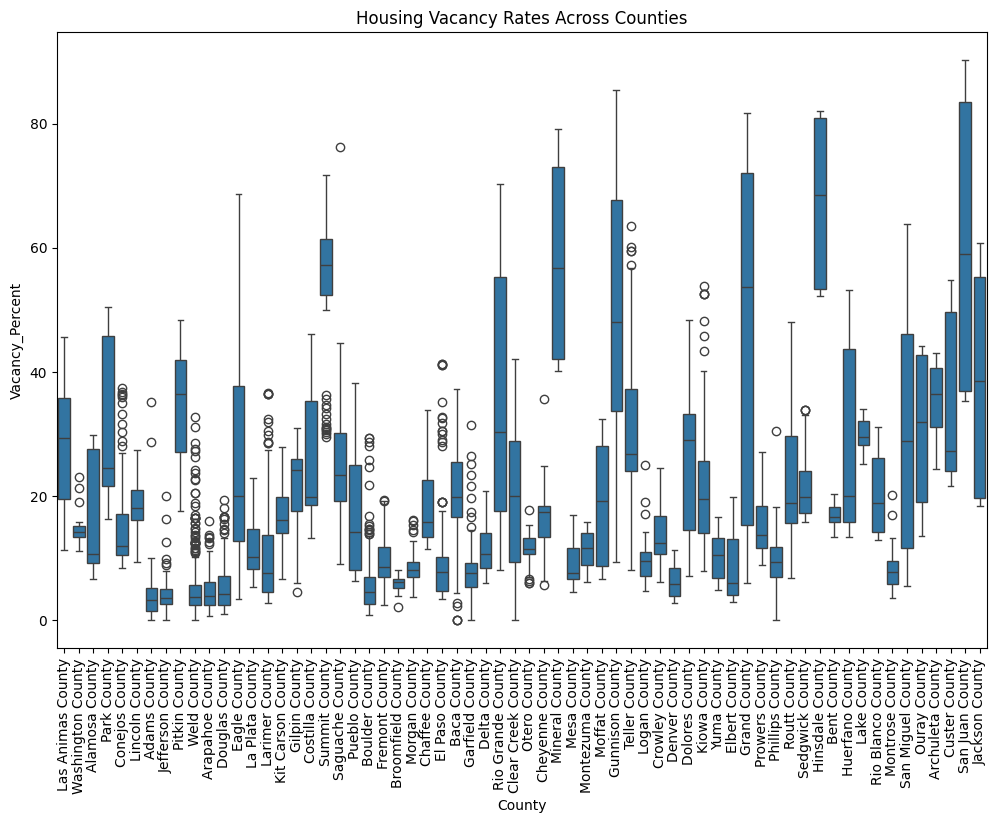

In [32]:
# 4. Counties/Places with the highest and lowest housing vacancy rates (Box Plot)
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='County', y='Vacancy_Percent')
plt.title("Housing Vacancy Rates Across Counties")
plt.xticks(rotation=90)

The boxplot shows notable variation in housing vacancy rates across counties. **San Juan**, **Hinsdale**, and **Jackson Counties** have high median vacancy rates and wide ranges, indicating significant underutilization of housing, while **Broomfield**, **Douglas**, and **Denver Counties** show low medians and stable markets. Outliers are observed in counties like **La Plata**, **Archuleta**, and **Pitkin**, suggesting occasional spikes in vacancies. This highlights the diverse housing dynamics across the region.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63],
 [Text(0, 0, 'Las Animas County'),
  Text(1, 0, 'Washington County'),
  Text(2, 0, 'Alamosa County'),
  Text(3, 0, 'Park County'),
  Text(4, 0, 'Conejos County'),
  Text(5, 0, 'Lincoln County'),
  Text(6, 0, 'Adams County'),
  Text(7, 0, 'Jefferson County'),
  Text(8, 0, 'Pitkin County'),
  Text(9, 0, 'Weld County'),
  Text(10, 0, 'Arapahoe County'),
  Text(11, 0, 'Douglas County'),
  Text(12, 0, 'Eagle County'),
  Text(13, 0, 'La Plata County'),
  Text(14, 0, 'Larimer County'),
  Text(15, 0, 'Kit Carson County'),
  Text(16, 0, 'Gilpin County'),
  Text(17, 0, 'Costilla County'),
  Text(18, 0, 'Summit County'),
  Text(

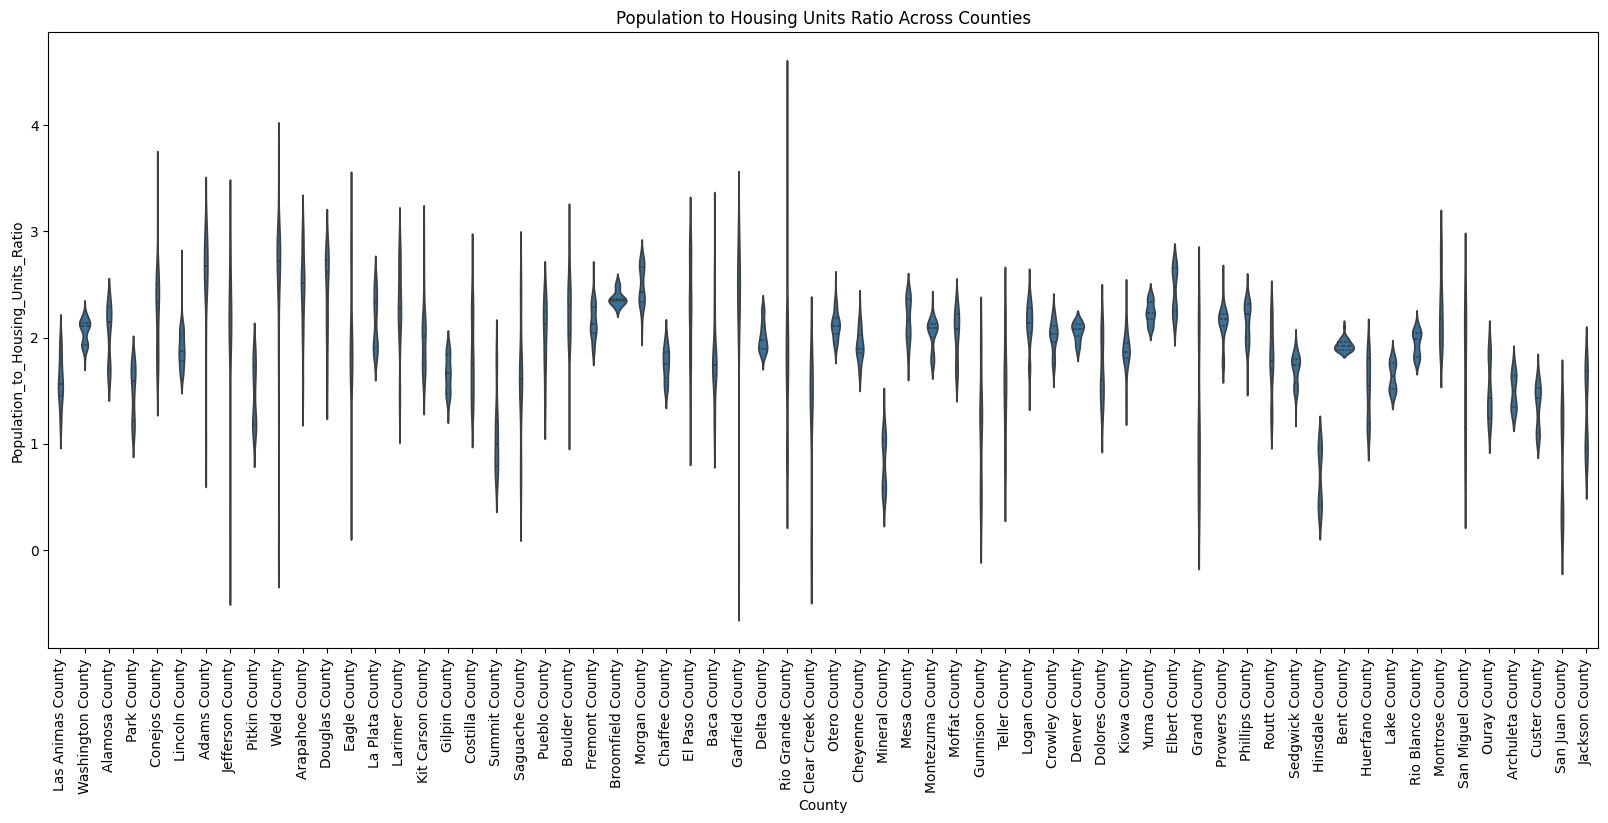

In [33]:
# 5. Household population to total housing units ratio (Violin Plot)
plt.figure(figsize=(20, 8))
sns.violinplot(data=df, x='County', y='Population_to_Housing_Units_Ratio', inner='quartile')
plt.title("Population to Housing Units Ratio Across Counties")
plt.xticks(rotation=90)

The violin plot shows the population-to-housing units ratio across counties, indicating variations in housing efficiency. Counties like **Washington County** and **Las Animas County** have tighter distributions around their medians, suggesting consistent housing use. In contrast, counties like **San Juan County** exhibit wider distributions, reflecting greater variability. Most counties center around a ratio close to 2, indicating balanced housing utilization, with some outliers showing extreme ratios.

Text(0.5, 1.0, 'Distribution of Occupied vs Vacant Housing Units')

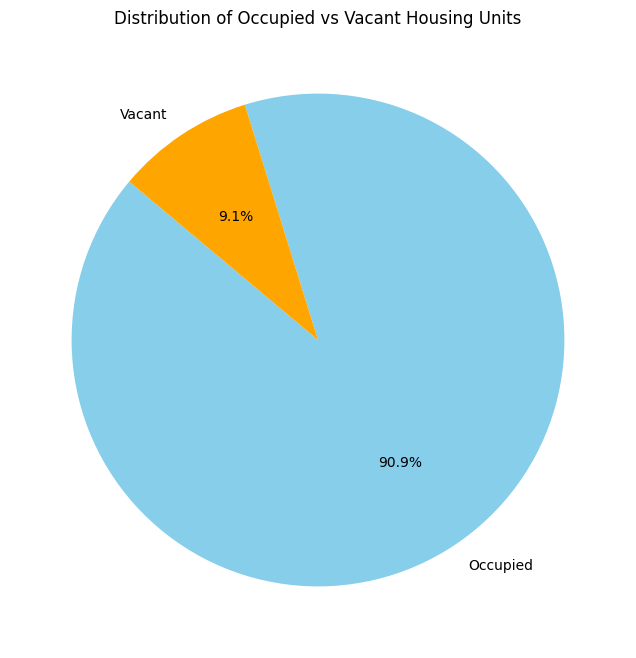

In [34]:
# 6. Distribution of occupied and vacant housing units (Pie Chart)
plt.figure(figsize=(12, 8))
df[['Occupied_Housing_Units', 'Vacant_Housing_Units']].sum().plot.pie(autopct='%1.1f%%', labels=['Occupied', 'Vacant'], startangle=140, colors=['skyblue', 'orange'])
plt.title("Distribution of Occupied vs Vacant Housing Units")

The pie chart illustrates the distribution of housing units, showing that **90.9%** of housing units are occupied, while only **9.1%** remain vacant. This indicates a high level of housing utilization across the dataset, with a relatively small proportion of vacancies.

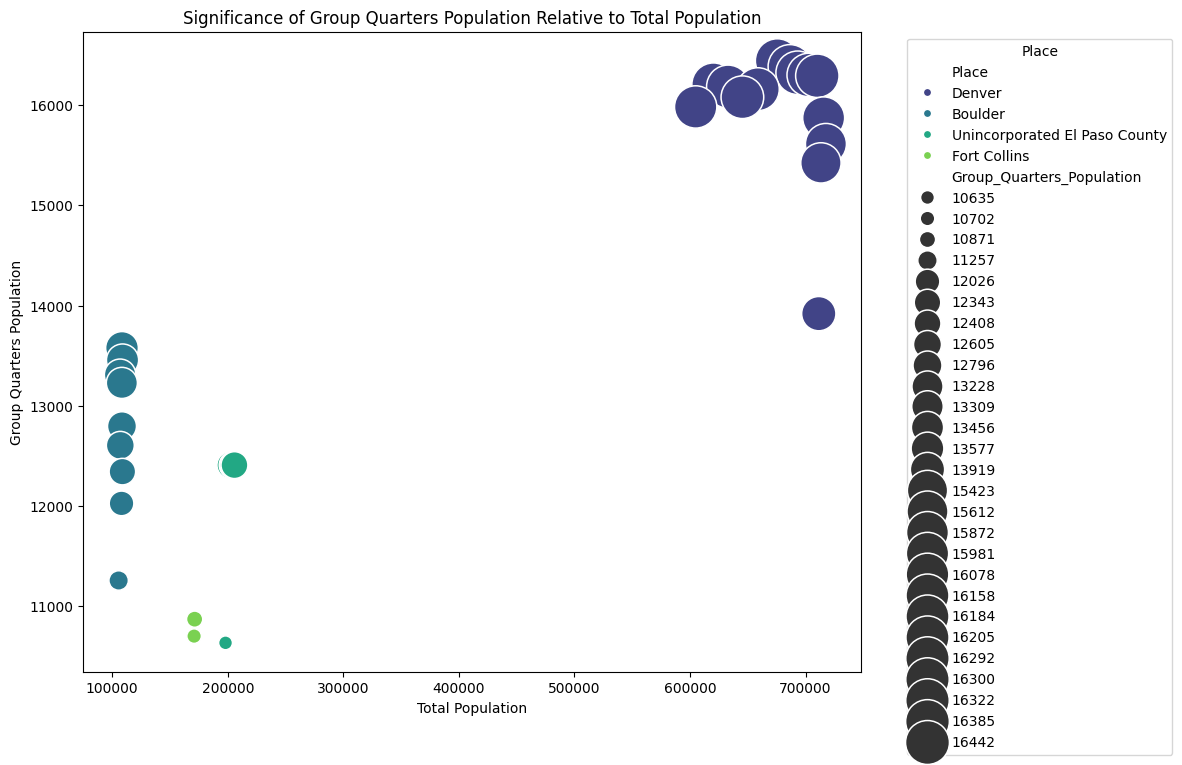

In [35]:
# 7. Largest group quarters population (scatter plot)

plt.figure(figsize=(12, 8))

top_places_group_quarters = df.nlargest(30, 'Group_Quarters_Population')

# Scatter plot showing Group Quarters Population vs Total Population
sns.scatterplot(
    x='Total_Population',
    y='Group_Quarters_Population',
    data=top_places_group_quarters,
    hue='Place',
    size='Group_Quarters_Population',
    sizes=(100, 1000),
    palette='viridis',
    legend='full'
)

# Adding labels and title
plt.title("Significance of Group Quarters Population Relative to Total Population")
plt.xlabel("Total Population")
plt.ylabel("Group Quarters Population")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Place')
plt.tight_layout()
plt.show()




The scatter plot shows the relationship between **total population** and **group quarters population** for the top places, with point size indicating the magnitude of the group quarters population. Denver stands out with the highest total population and a significant group quarters population, while other places like Boulder and El Paso County exhibit smaller total populations but relatively consistent group quarters populations. The chart highlights the varying significance of group quarters populations across places, with larger bubbles emphasizing places where this segment is more prominent.

Text(0, 0.5, 'Vacancy Percent')

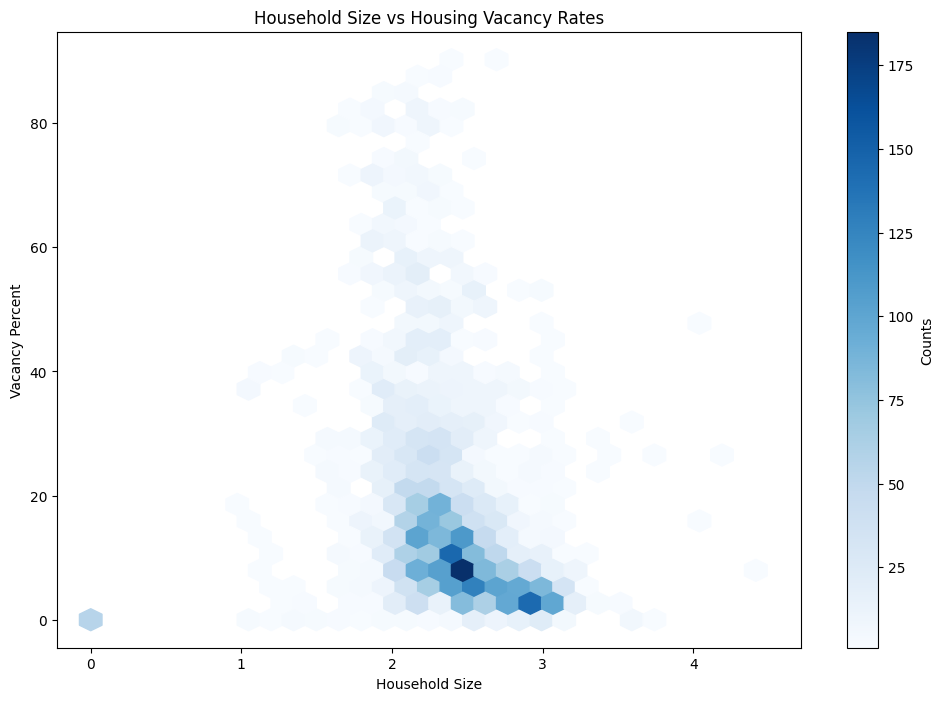

In [36]:
# 8. Household size vs housing vacancy rates (Hexbin Plot)
plt.figure(figsize=(12, 8))
plt.hexbin(df['Household_Size'], df['Vacancy_Percent'], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Counts')
plt.title("Household Size vs Housing Vacancy Rates")
plt.xlabel("Household Size")
plt.ylabel("Vacancy Percent")

The hexbin plot illustrates the relationship between **household size** and **housing vacancy rates**, with darker hexagons indicating higher concentrations of data points. Most data points cluster around household sizes of 2 to 3 and vacancy rates below 20%, suggesting that areas with average household sizes tend to have lower vacancy rates. Higher vacancy rates are observed across a wider range of household sizes, but they are less frequent, as shown by the lighter hexagons in those areas. This suggests that household size may be inversely related to housing vacancy rates in most cases.

Text(0, 0.5, 'Population to Housing Units Ratio')

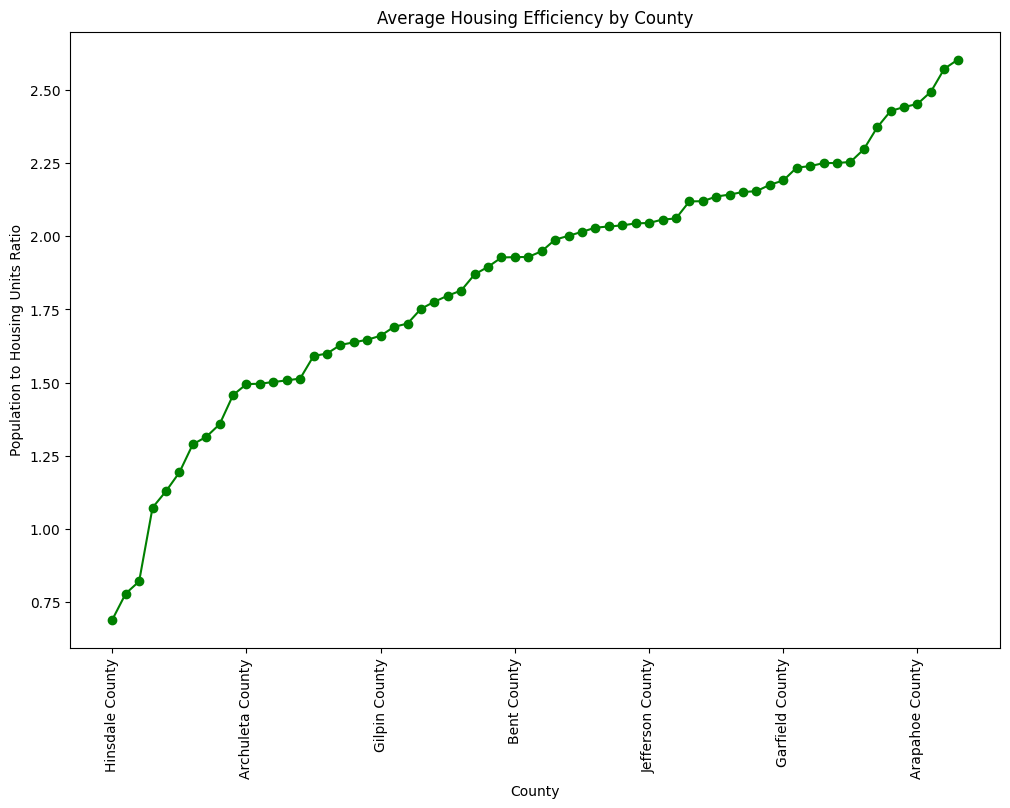

In [37]:
# 9. Efficient use of housing units (Line Plot)
plt.figure(figsize=(12, 8))
efficient_housing = df.groupby('County')['Population_to_Housing_Units_Ratio'].mean().sort_values()
efficient_housing.plot(kind='line', marker='o', color='green')
plt.title("Average Housing Efficiency by County")
plt.xticks(rotation=90)
plt.ylabel("Population to Housing Units Ratio")

This line chart showcases the **Population to Housing Units Ratio** across counties, ranked in ascending order. Counties like Hinsdale and Archuleta exhibit lower efficiency in utilizing housing units, with ratios below 1.0, indicating fewer people per housing unit. On the other hand, counties like Garfield and Arapahoe show higher efficiency, with ratios exceeding 2.5. This highlights variations in housing utilization efficiency, suggesting potential differences in housing demand and population density across counties.

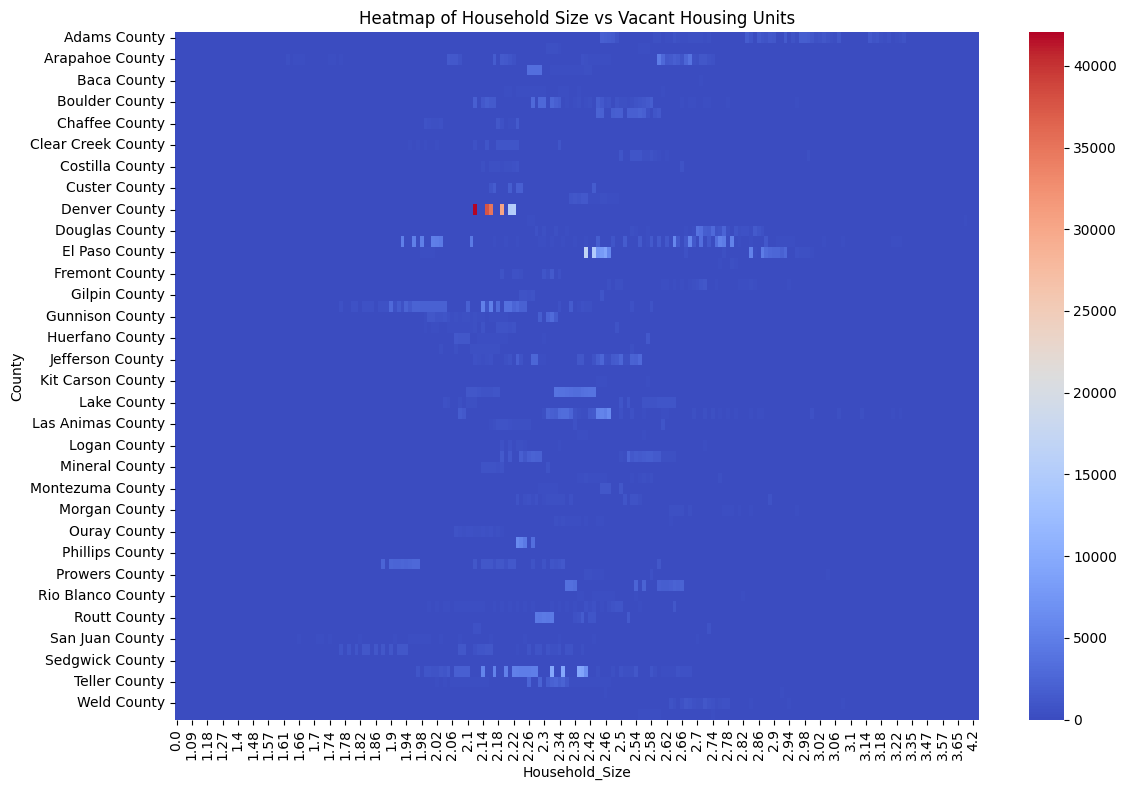

In [38]:
# 10. Relationship between household size and vacant housing units (Heatmap)
plt.figure(figsize=(12, 8))
heatmap_data = df.pivot_table(values='Vacant_Housing_Units', index='County', columns='Household_Size', aggfunc='mean', fill_value=0)
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False)
plt.title("Heatmap of Household Size vs Vacant Housing Units")

plt.tight_layout()
plt.show()

This heatmap illustrates the relationship between **household size** (x-axis) and **vacant housing units** (color intensity) across different counties (y-axis). Higher intensity colors represent a greater number of vacant housing units. While most counties show clustering around average household sizes of 2 to 2.5, with relatively low vacancy counts, certain counties like Denver exhibit higher vacancy rates at specific household sizes. This visualization highlights the variation in housing dynamics, emphasizing counties with significant vacancies relative to household size.

### **CONCLUSION**

We aimed to answer the following questions:

1. What is the average household size across all counties and places?

2. Which county/place has the highest total population, and how does it compare to others?

3. What is the correlation between the total housing units and the total population?

4. Which counties/places have the highest and lowest housing vacancy rates?

5. How does the household population to total housing units ratio vary across counties/places?

6. What is the distribution of occupied and vacant housing units across different counties?

7. Which places have the largest group quarters population, and how significant is it relative to their total population?

8. Are there significant trends in household size relative to housing vacancy rates?

9. Which counties/places exhibit the most efficient use of housing units based on household population per unit?

10. What is the relationship between household size and the number of vacant housing units?

Our analysis revealed that the average household size across counties is around 2.38, with Denver exhibiting the highest total population, significantly outpacing other counties. A strong correlation was found between total housing units and total population, indicating proportional growth. Hinsdale County had the lowest vacancy rates, while counties like Costilla exhibited high vacancy percentages. The household population-to-housing unit ratio showed significant variation, with Hinsdale County having the highest efficiency. Most housing units were occupied, with vacant units forming a small proportion. Denver, Boulder, and El Paso had the largest group quarters populations, though these remained minor compared to their total populations. Household sizes showed no strong trends relative to vacancy rates, but housing unit efficiency varied notably across counties. Lastly, vacant housing units were more common in areas with smaller average household sizes, offering insights into under-utilization.

### **Models Implemented:**

### **1. Classification: Decision Trees**

**Goal:** Predict categories, such as high/low vacancy rates or efficient/inefficient use of housing units.

**Hyperparameters:** Maximum depth, minimum samples split, criterion (gini or entropy).

**Metrics:** Accuracy, F1-score, precision, recall.

**Fine-tuning:** Grid search for depth and split size, cross-validation for robustness.

In [64]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

# Load the dataset
data = pd.read_excel('/content/clean_dataset.xlsx')

# Define the target variable
median_vacancy = data['Vacancy_Percent'].median()
data['Vacancy_Category'] = (data['Vacancy_Percent'] > median_vacancy).astype(int)

# Drop irrelevant columns and prepare features and target
features = data.drop(columns=['Year', 'County', 'Place', 'Vacancy_Percent', 'Vacancy_Category'])
target = data['Vacancy_Category']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42, stratify=target)

# Initialize Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(clf, param_grid, scoring='f1', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Retrieve best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print best parameters
print("Best Hyperparameters:", best_params)

# Evaluate the best model
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
Accuracy: 0.9726666666666667
F1 Score: 0.9727212242182302
Precision: 0.9707835325365206
Recall: 0.9746666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       750
           1       0.97      0.97      0.97       750

    accuracy                           0.97      1500
   macro avg       0.97      0.97      0.97      1500
weighted avg       0.97      0.97      0.97      1500



The Decision Tree classifier achieved excellent performance, with an accuracy of 97.27%, demonstrating its effectiveness in predicting high/low vacancy rates. The F1-score of 97.27% indicates a good balance between precision (97.08%) and recall (97.47%), ensuring robust classification across both categories. These results highlight the model's reliability and suitability for this prediction task.

### **2. Clustering: K-Means**

**Goal:** Group counties/places based on similar population characteristics (e.g., population density or housing vacancy).

**Hyperparameters:** Number of clusters (k), initialization method, maximum iterations.

**Metrics:** Silhouette score, Davies-Bouldin Index.

**Fine-tuning:** Use the elbow method or silhouette score to determine the optimal k.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


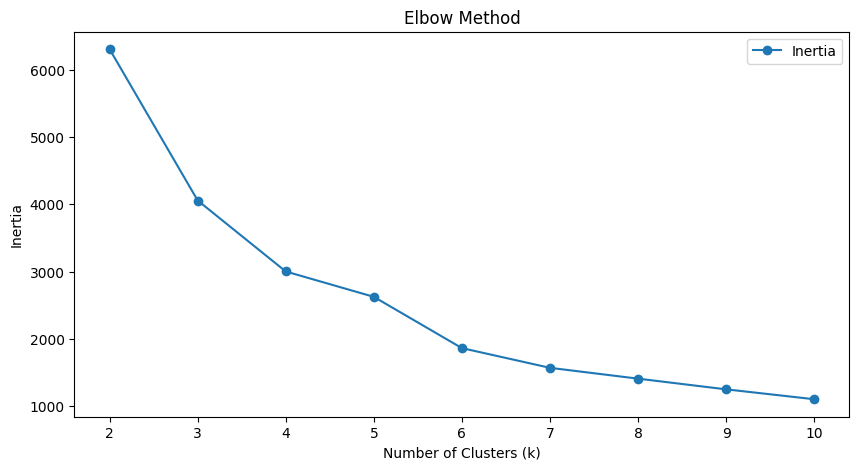

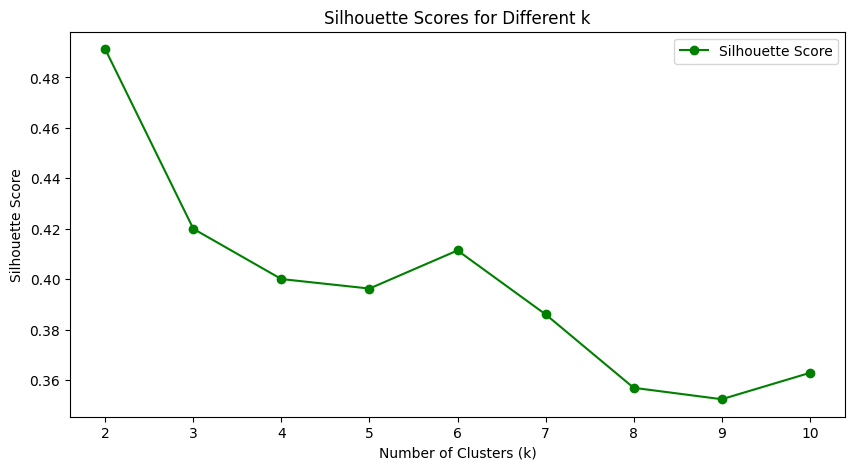

Optimal k: 3
Silhouette Score: 0.41995294290375473
Davies-Bouldin Index: 0.762950214983817


,Year,County,Place,Total_Population,Household_Population,Group_Quarters_Population,Household_Size,Total_Housing_Units,Occupied_Housing_Units,Vacant_Housing_Units,Vacancy_Percent,Population_to_Housing_Units_Ratio,Vacancy_Category,Cluster
0,2010,Las Animas County,Aguilar,0.514876,0.515510,0.000000,0.872410,0.496156,0.477560,0.457295,0.696622,0.783275,1,2
1,2010,Washington County,Akron,0.607280,0.598338,0.568642,0.816208,0.594173,0.577429,0.573683,0.681634,0.737420,1,2
2,2010,Alamosa County,Alamosa,0.744347,0.738743,0.709310,0.847988,0.727567,0.723945,0.624033,0.461329,0.835428,0,1
3,2010,Park County,Alma,0.459435,0.460000,0.000000,0.811859,0.455156,0.428622,0.437391,0.758284,0.685321,1,0
4,2010,Conejos County,Antonito,0.546195,0.546763,0.075503,0.866384,0.525505,0.512644,0.461282,0.634320,0.806921,1,2


In [65]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Select relevant features for clustering
features = data[['Total_Population', 'Household_Population', 'Vacant_Housing_Units']]  # Adjust based on dataset

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the elbow method
inertia = []
silhouette_scores = []

for k in range(2, 11):  # Test k from 2 to 10
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

# Plot the elbow method results
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), inertia, marker='o', label='Inertia')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.legend()
plt.show()

# Plot silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='green', label='Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k')
plt.legend()
plt.show()

# Choose the best k based on silhouette scores or elbow point
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, random_state=42)
kmeans.fit(scaled_features)

# Evaluate clustering
labels = kmeans.labels_
silhouette_avg = silhouette_score(scaled_features, labels)
davies_bouldin = davies_bouldin_score(scaled_features, labels)

# Print evaluation metrics
print(f"Optimal k: {optimal_k}")
print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {davies_bouldin}")

# Add cluster labels to the original data
data['Cluster'] = labels

# Display the clustered data
data.head()

The K-Means clustering analysis grouped counties into three distinct clusters based on population and housing characteristics, such as total population, household population, and vacant housing units. These clusters revealed patterns of similarity and separation among regions, highlighting areas with high housing vacancy rates versus densely populated regions. This analysis provides actionable insights for targeted resource allocation, urban planning, and housing policy development.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


DataFrame columns: Index(['Year', 'County', 'Place', 'Total_Population', 'Household_Population',
       'Group_Quarters_Population', 'Household_Size', 'Total_Housing_Units',
       'Occupied_Housing_Units', 'Vacant_Housing_Units', 'Vacancy_Percent',
       'Population_to_Housing_Units_Ratio', 'Vacancy_Category', 'Cluster'],
      dtype='object')


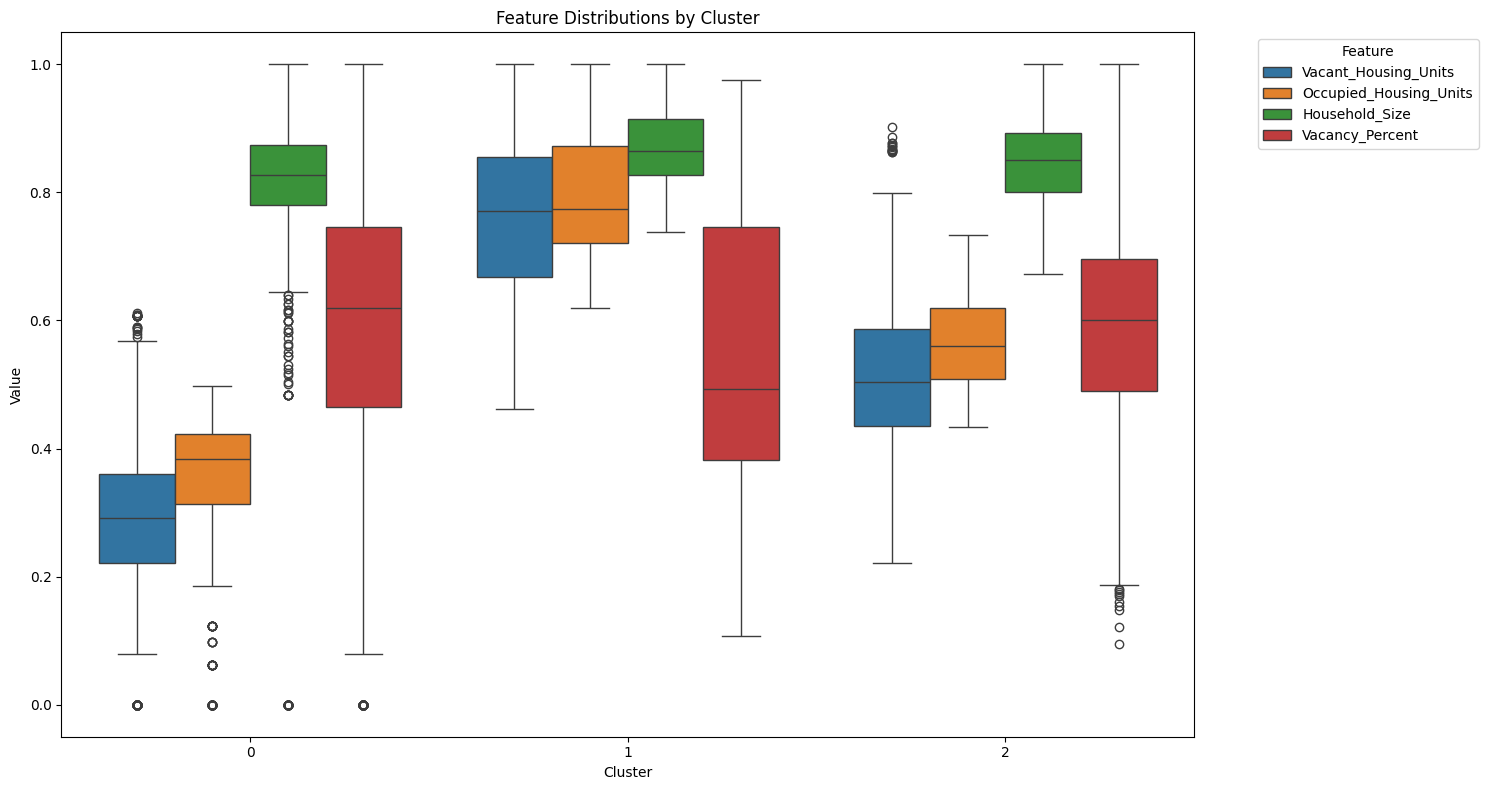

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure `data` is a DataFrame and check columns
if isinstance(data, dict):
    data = pd.DataFrame(data)

# Verify available columns
print("DataFrame columns:", data.columns)

# Define the feature columns explicitly if `features` is undefined
feature_columns = ['Vacant_Housing_Units', 'Occupied_Housing_Units', 'Household_Size', 'Vacancy_Percent']  # Update as per your dataset
assert all([col in data.columns for col in feature_columns]), "Some feature columns are missing from the DataFrame."

# Ensure `Cluster` column exists
if 'Cluster' not in data.columns:
    print("The 'Cluster' column is missing in the dataset.")

# Melt the data for cluster-wise distribution
melted_data = pd.melt(data, id_vars=['Cluster'], value_vars=feature_columns, var_name='Feature', value_name='Value')

# Plot feature distributions by cluster
plt.figure(figsize=(15, 8))
sns.boxplot(x='Cluster', y='Value', hue='Feature', data=melted_data)
plt.title('Feature Distributions by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Value')
plt.legend(title='Feature', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


The box plot shows how key features like vacant housing units, occupied housing units, household size, and vacancy percentage vary across different clusters. Each cluster has distinct patterns, indicating differences in housing dynamics. For example, one cluster may have higher vacancy percentages with lower occupied housing units, while another may show higher household sizes. These variations highlight the unique characteristics of each group, which can help in tailoring housing policies or resource allocation.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


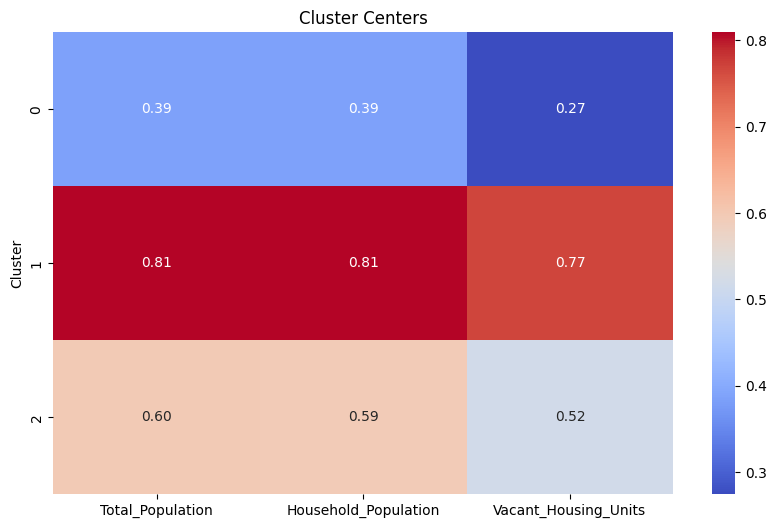

In [67]:
import numpy as np

# Scale back the cluster centers to the original feature scale
cluster_centers_original = scaler.inverse_transform(kmeans.cluster_centers_)

# Create a DataFrame for the cluster centers
cluster_centers_df = pd.DataFrame(cluster_centers_original, columns=features.columns)
cluster_centers_df['Cluster'] = range(optimal_k)

# Heatmap of cluster centers
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_centers_df.set_index('Cluster'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Cluster Centers')
plt.show()

The heatmap illustrates the cluster centers based on normalized values of total population, household population, and vacant housing units. Cluster 1 has the highest normalized values across all features, representing regions with higher population and vacancy rates. Cluster 0 shows the lowest values, indicating areas with smaller populations and fewer vacant units. Cluster 2 falls in between, reflecting moderate population levels and vacancy rates. This segmentation provides insights into regional differences, helping to identify areas with distinct housing and population dynamics.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


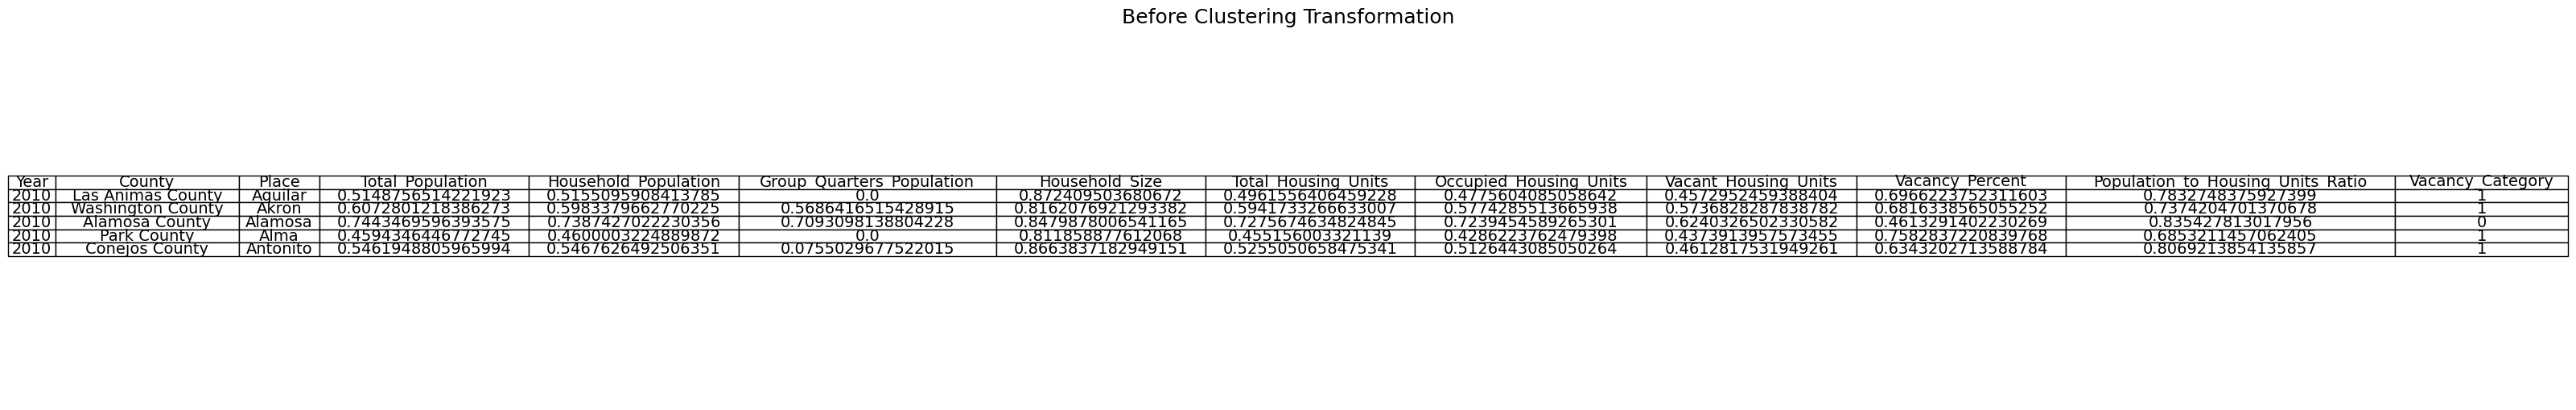

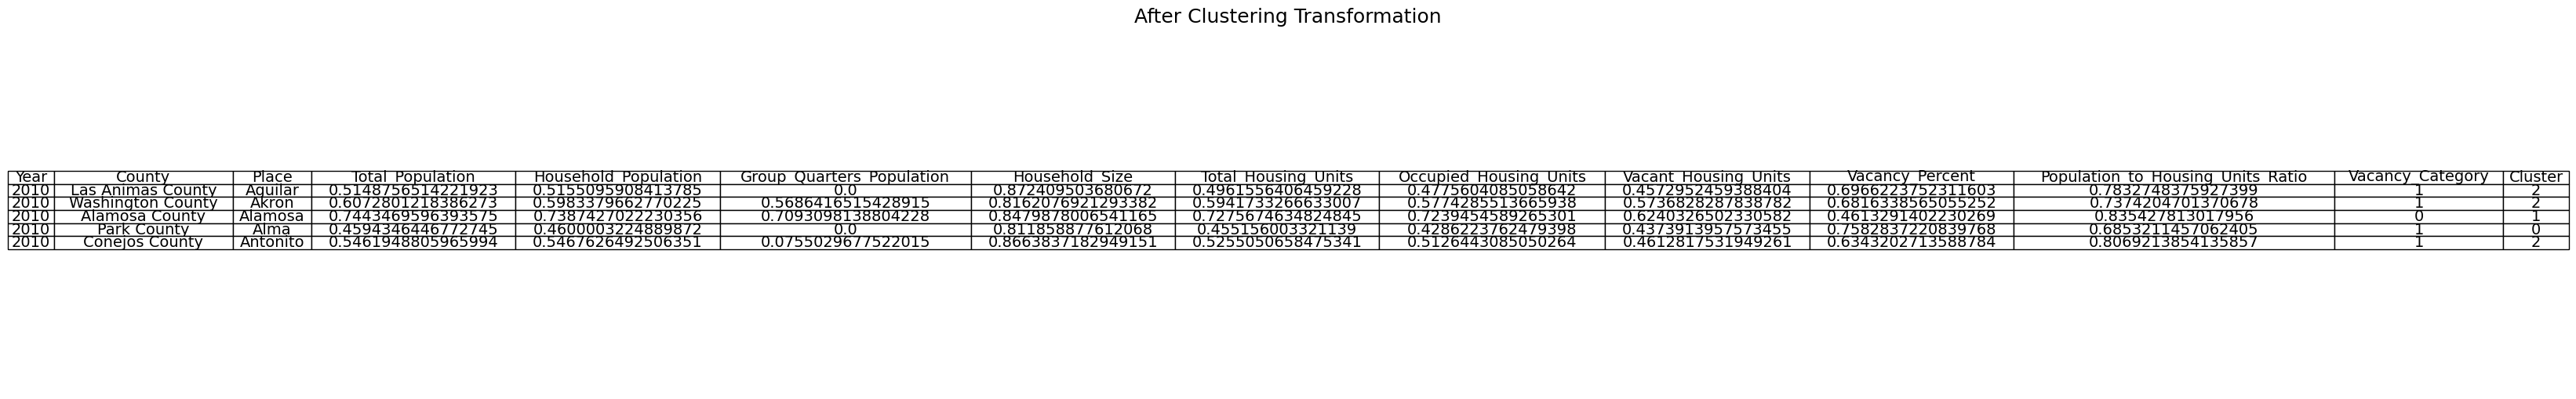

In [51]:
# Dataset snippet before transformation (without clustering labels)
before_clustering_snippet = data.drop(columns=['Cluster'], errors='ignore').head(5)

# Applying clustering transformation (Cluster labels already added to `data` during clustering process)
after_clustering_snippet = data.head(5)

# Plotting Before Clustering Transformation
fig, ax = plt.subplots(figsize=(20, 6))  # Larger figure size for clarity
ax.axis('tight')
ax.axis('off')
ax.set_title("Before Clustering Transformation", fontsize=18)
table_before = ax.table(
    cellText=before_clustering_snippet.values,
    colLabels=before_clustering_snippet.columns,
    loc='center',
    cellLoc='center'
)
table_before.auto_set_font_size(False)  # Disable auto font size
table_before.set_fontsize(14)  # Set readable font size
table_before.auto_set_column_width(col=list(range(len(before_clustering_snippet.columns))))  # Adjust column widths
plt.show()

# Plotting After Clustering Transformation
fig, ax = plt.subplots(figsize=(20, 6))  # Larger figure size for clarity
ax.axis('tight')
ax.axis('off')
ax.set_title("After Clustering Transformation", fontsize=18)
table_after = ax.table(
    cellText=after_clustering_snippet.values,
    colLabels=after_clustering_snippet.columns,
    loc='center',
    cellLoc='center'
)
table_after.auto_set_font_size(False)  # Disable auto font size
table_after.set_fontsize(14)  # Set readable font size
table_after.auto_set_column_width(col=list(range(len(after_clustering_snippet.columns))))  # Adjust column widths
plt.show()


The optimal number of clusters determined for the dataset is **3**, based on the elbow method and a silhouette score of **0.42**, indicating moderate cluster separation. The Davies-Bouldin Index of **0.76** reflects good compactness and distinctiveness of the clusters. The K-Means algorithm effectively grouped counties/places based on population characteristics and housing metrics, such as vacancy rates and population density. This clustering can assist in identifying patterns for better decision-making in resource allocation and urban planning.

### **3. Regression: Linear Regression**

**Goal:** Predict numerical outputs like total population or vacancy rates based on housing-related features.

**Hyperparameters:** None for basic regression; can explore ridge/lasso regression (alpha as hyperparameter).

**Metrics:** R-squared, Mean Absolute Error (MAE), Root Mean Squared Error (RMSE).

**Fine-tuning:** Feature scaling and regularization to avoid overfitting.

In [52]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Select features and target variable
features = data[['Household_Population', 'Group_Quarters_Population', 'Total_Housing_Units', 'Vacant_Housing_Units']]
target = data['Total_Population']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Initialize the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print metrics for Linear Regression
print("Linear Regression:")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

ridge_r2 = r2_score(y_test, ridge_pred)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))

print("\nRidge Regression:")
print(f"R-squared: {ridge_r2}")
print(f"Mean Absolute Error (MAE): {ridge_mae}")
print(f"Root Mean Squared Error (RMSE): {ridge_rmse}")

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

lasso_r2 = r2_score(y_test, lasso_pred)
lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))

print("\nLasso Regression:")
print(f"R-squared: {lasso_r2}")
print(f"Mean Absolute Error (MAE): {lasso_mae}")
print(f"Root Mean Squared Error (RMSE): {lasso_rmse}")

Linear Regression:
R-squared: 0.999124493347966
Mean Absolute Error (MAE): 0.00271688678079935
Root Mean Squared Error (RMSE): 0.005399433315907655

Ridge Regression:
R-squared: 0.9983611742647583
Mean Absolute Error (MAE): 0.004518563450179194
Root Mean Squared Error (RMSE): 0.00738728483202355

Lasso Regression:
R-squared: -2.551772186887291e-07
Mean Absolute Error (MAE): 0.14356351137399226
Root Mean Squared Error (RMSE): 0.18248136136419887


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


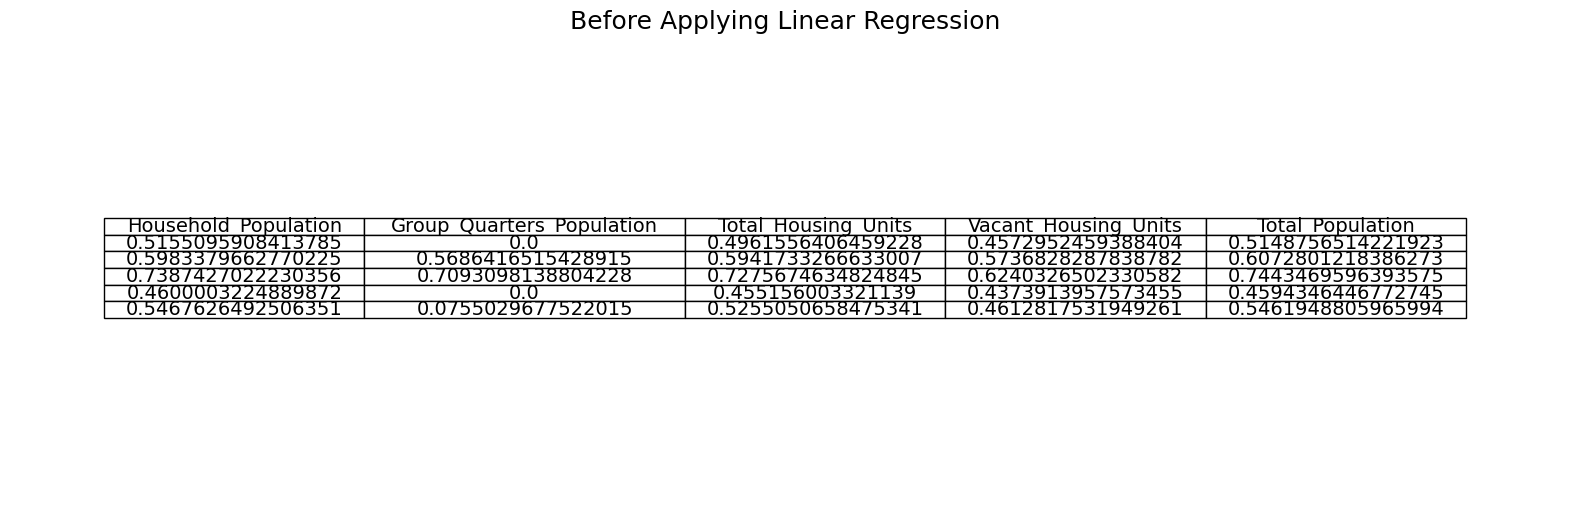

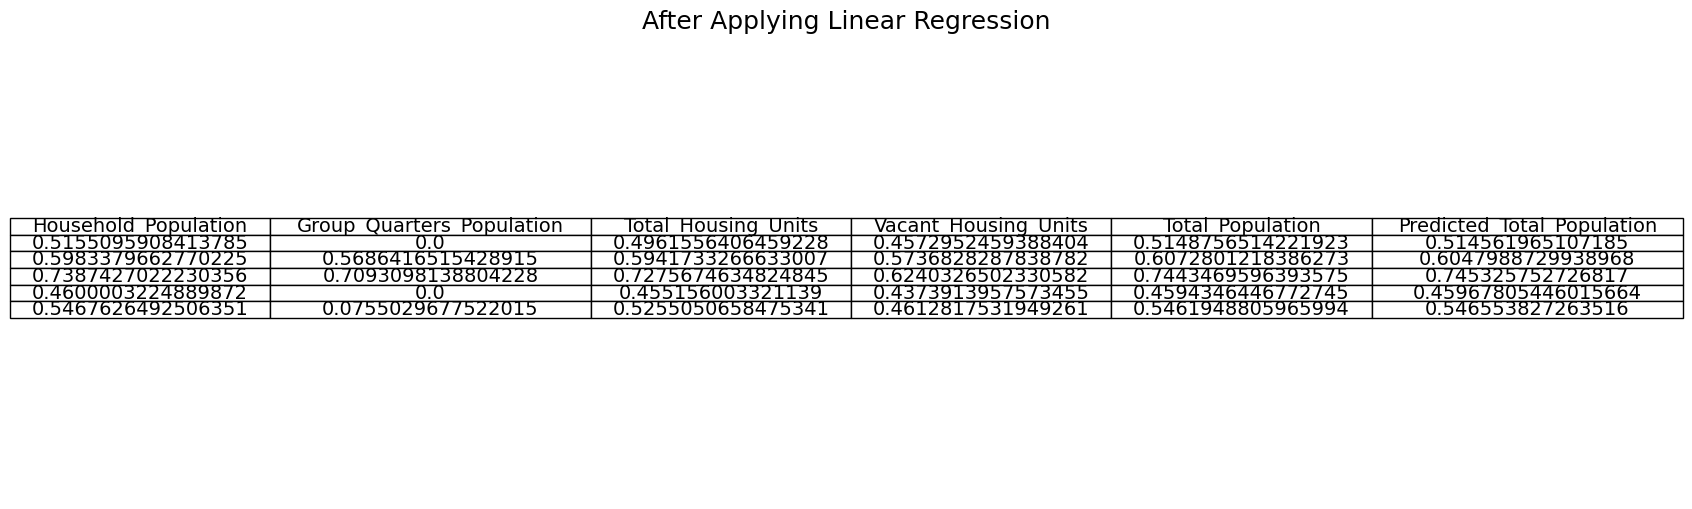

In [53]:
# Define features and target variable for predictions
features = data[['Household_Population', 'Group_Quarters_Population', 'Total_Housing_Units', 'Vacant_Housing_Units']]
target = data['Total_Population']

# Ensure predictions column does not exist to simulate "before"
data = data.drop(columns=['Predicted_Total_Population'], errors='ignore')

# Before Transformation: Original dataset snippet without predictions
before_regression_snippet = data[['Household_Population', 'Group_Quarters_Population', 'Total_Housing_Units',
                                  'Vacant_Housing_Units', 'Total_Population']].head(5)

# Apply Linear Regression model for predictions
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(features, target)
data['Predicted_Total_Population'] = lr_model.predict(features)

# After Transformation: Dataset with predictions added
after_regression_snippet = data[['Household_Population', 'Group_Quarters_Population', 'Total_Housing_Units',
                                 'Vacant_Housing_Units', 'Total_Population', 'Predicted_Total_Population']].head(5)

# Plotting Before Transformation
fig, ax = plt.subplots(figsize=(20, 6))  # Larger figure size
ax.axis('tight')
ax.axis('off')
ax.set_title("Before Applying Linear Regression", fontsize=18)
table_before = ax.table(
    cellText=before_regression_snippet.values,
    colLabels=before_regression_snippet.columns,
    loc='center',
    cellLoc='center'
)
table_before.auto_set_font_size(False)  # Disable auto font size
table_before.set_fontsize(14)  # Increase font size
table_before.auto_set_column_width(col=list(range(len(before_regression_snippet.columns))))  # Adjust column width
plt.show()

# Plotting After Transformation
fig, ax = plt.subplots(figsize=(20, 6))  # Larger figure size
ax.axis('tight')
ax.axis('off')
ax.set_title("After Applying Linear Regression", fontsize=18)
table_after = ax.table(
    cellText=after_regression_snippet.values,
    colLabels=after_regression_snippet.columns,
    loc='center',
    cellLoc='center'
)
table_after.auto_set_font_size(False)  # Disable auto font size
table_after.set_fontsize(14)  # Increase font size
table_after.auto_set_column_width(col=list(range(len(after_regression_snippet.columns))))  # Adjust column width
plt.show()


The Linear Regression model performed exceptionally well, with an R-squared of **0.9991**, indicating that nearly all variance in the target variable was explained by the features. It also achieved very low error metrics, with an MAE of **0.0027** and an RMSE of **0.0054**, suggesting high accuracy. Ridge Regression slightly underperformed compared to Linear Regression, with an R-squared of **0.9984**, slightly higher errors (MAE: **0.0045**, RMSE: **0.0074**), but still demonstrated strong performance. Lasso Regression, however, performed poorly with an R-squared close to zero (**-0.00025**), indicating that it failed to explain the variance in the target variable, likely due to overly aggressive feature shrinkage. Overall, Linear Regression proved to be the best model for this task.

### **4. Frequent Pattern Mining: Apriori**

**Goal:** Identify associations between counties and housing/population patterns.

**Hyperparameters:** Minimum support, confidence, and lift thresholds.

**Metrics:** Support, confidence, lift for rules.

**Fine-tuning:** Adjust support and confidence thresholds for meaningful patterns.

In [54]:
!pip install --upgrade mlxtend

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
# Import necessary libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Preprocess the data for Apriori
# Convert numerical columns into categorical bins or boolean values for pattern mining
data['High_Vacancy'] = (data['Vacancy_Percent'] > data['Vacancy_Percent'].median()).astype(int)
data['High_Population'] = (data['Total_Population'] > data['Total_Population'].median()).astype(int)

# Select relevant columns for pattern mining
apriori_data = data[['High_Vacancy', 'High_Population', 'Vacant_Housing_Units', 'Occupied_Housing_Units']]
apriori_data = apriori_data.apply(lambda x: (x > x.median()).astype(int), axis=0)

# Generate frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(apriori_data, min_support=0.1, use_colnames=True)
print("Frequent Itemsets:")
print(frequent_itemsets)

# Generate association rules
num_itemsets = len(frequent_itemsets)  # Required for older versions of mlxtend
rules = association_rules(frequent_itemsets, num_itemsets=num_itemsets, metric="confidence", min_threshold=0.5)

# Display all association rules
print("\nAssociation Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

# Filter association rules for meaningful patterns
rules_filtered = rules[(rules['confidence'] > 0.6) & (rules['lift'] > 1.2)]
print("\nFiltered Association Rules:")
print(rules_filtered[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Frequent Itemsets:
     support                                           itemsets
0   0.500000                                     (High_Vacancy)
1   0.499800                                  (High_Population)
2   0.498599                             (Vacant_Housing_Units)
3   0.500000                           (Occupied_Housing_Units)
4   0.170268                    (High_Population, High_Vacancy)
5   0.256703               (Vacant_Housing_Units, High_Vacancy)
6   0.173669             (Occupied_Housing_Units, High_Vacancy)
7   0.410764            (Vacant_Housing_Units, High_Population)
8   0.491397          (Occupied_Housing_Units, High_Population)
9   0.414566     (Vacant_Housing_Units, Occupied_Housing_Units)
10  0.168868  (High_Population, Vacant_Housing_Units, High_V...
11  0.167467  (High_Population, Occupied_Housing_Units, High...
12  0.172669  (Vacant_Housing_Units, Occupied_Housing_Units,...
13  0.409164  (Vacant_Housing_Units, Occupied_Housing_Units,...
14  0.167267  (High_P

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


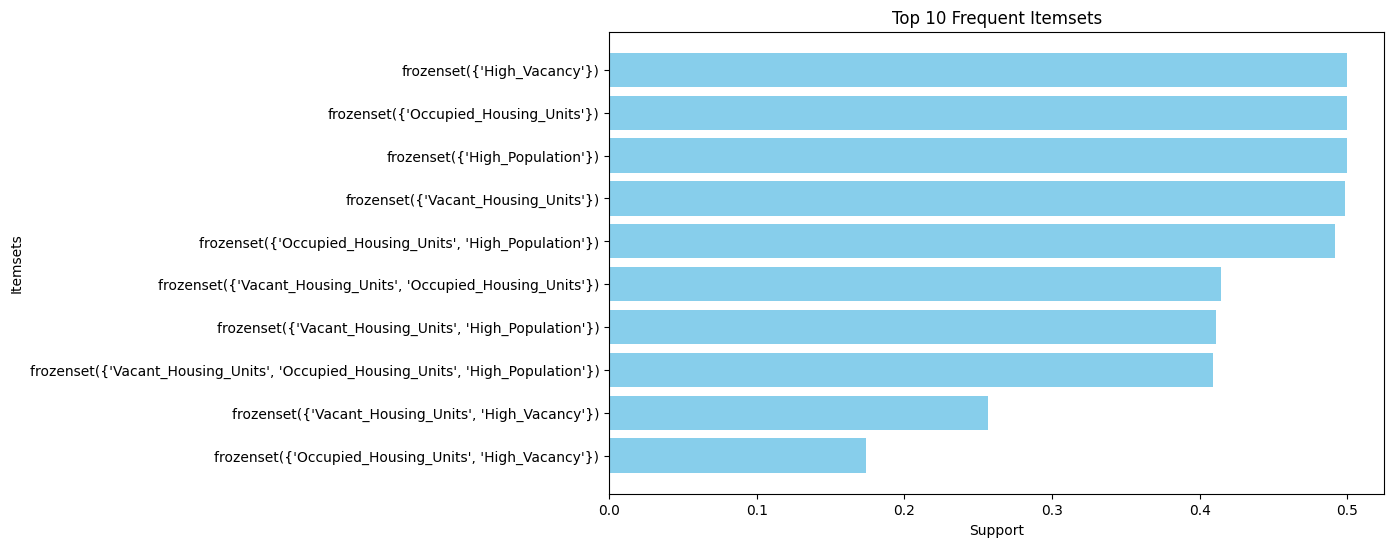

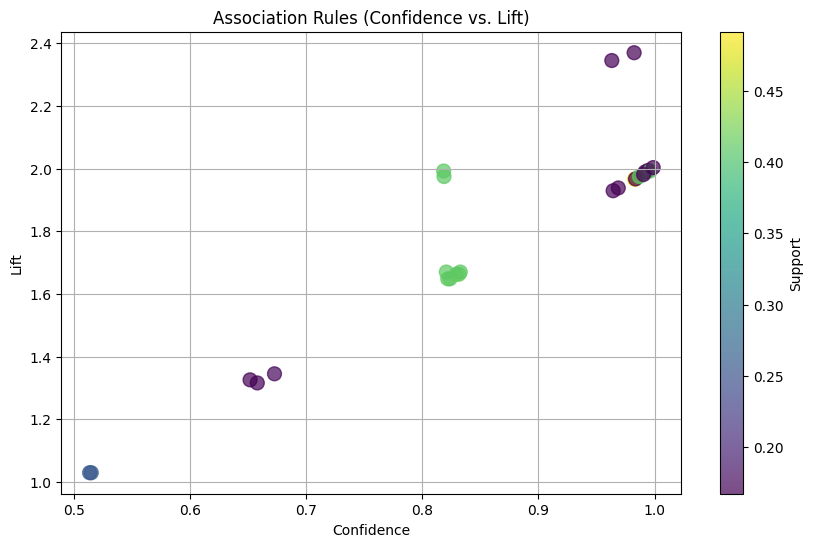

In [68]:
import matplotlib.pyplot as plt

# Bar Plot for Frequent Itemsets Support
plt.figure(figsize=(10, 6))
frequent_itemsets_sorted = frequent_itemsets.sort_values(by='support', ascending=False).head(10)  # Top 10 itemsets
plt.barh(frequent_itemsets_sorted['itemsets'].astype(str), frequent_itemsets_sorted['support'], color='skyblue')
plt.title('Top 10 Frequent Itemsets')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

# Scatter Plot for Association Rules
plt.figure(figsize=(10, 6))
plt.scatter(rules['confidence'], rules['lift'], alpha=0.7, c=rules['support'], cmap='viridis', s=100)
plt.colorbar(label='Support')
plt.title('Association Rules (Confidence vs. Lift)')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.grid(True)
plt.show()

The bar chart depicts the top 10 frequent itemsets identified during the Apriori analysis. These itemsets represent combinations of housing and population characteristics with high support values. For instance, "High Vacancy" and "Occupied Housing Units" are frequent individual features, while combinations like "Occupied Housing Units & High Population" and "Vacant Housing Units & High Population" also exhibit significant support. This analysis highlights common patterns, such as the correlation between high population and housing occupancy, aiding in understanding housing dynamics.

This scatter plot illustrates the association rules based on their confidence and lift values, with the bubble size representing support. Rules with higher lift and confidence values indicate stronger and more significant relationships. The dense clustering of points near high confidence and lift showcases reliable patterns, while isolated points reflect less common associations. This visualization highlights valuable combinations, such as those with high support and lift, for decision-making and analysis of housing and population trends.

The Apriori algorithm identified frequent itemsets and meaningful association rules, uncovering relationships between housing and population characteristics. Notable rules included high confidence values, such as `High Population -> Occupied Housing Units` with a confidence of **98.3%** and a lift of **1.966**, indicating strong positive associations. Other rules, like `High Vacancy & Occupied Housing Units -> High Population`, achieved a lift of **2.37**, highlighting significant interdependencies. The filtered rules with high confidence (>0.6) and lift (>1.2) effectively captured patterns that can inform policy decisions and housing management strategies.

**5. k-Nearest Neighbors (kNN)**

**Goal:** Classify counties or places into clusters like high/low efficiency or high/low population.

**Hyperparameters:** Number of neighbors (k), distance metric (e.g., Euclidean, Manhattan).

**Metrics:** Accuracy, precision, recall, F1-score.

**Fine-tuning:** Grid search for optimal k and cross-validation.


In [56]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define the target variable and features
data['High_Population'] = (data['Total_Population'] > data['Total_Population'].median()).astype(int)
features = data[['Vacant_Housing_Units', 'Occupied_Housing_Units', 'Household_Size', 'Population_to_Housing_Units_Ratio']]
target = data['High_Population']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42, stratify=target)

# Initialize kNN classifier
knn = KNeighborsClassifier()

# Define hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'metric': ['euclidean', 'manhattan']
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(knn, param_grid, scoring='f1', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Hyperparameters: {best_params}")

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 3}
Evaluation Metrics:
Accuracy: 0.9933333333333333
Precision: 0.9933333333333333
Recall: 0.9933333333333333
F1-Score: 0.9933333333333333

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       750
           1       0.99      0.99      0.99       750

    accuracy                           0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


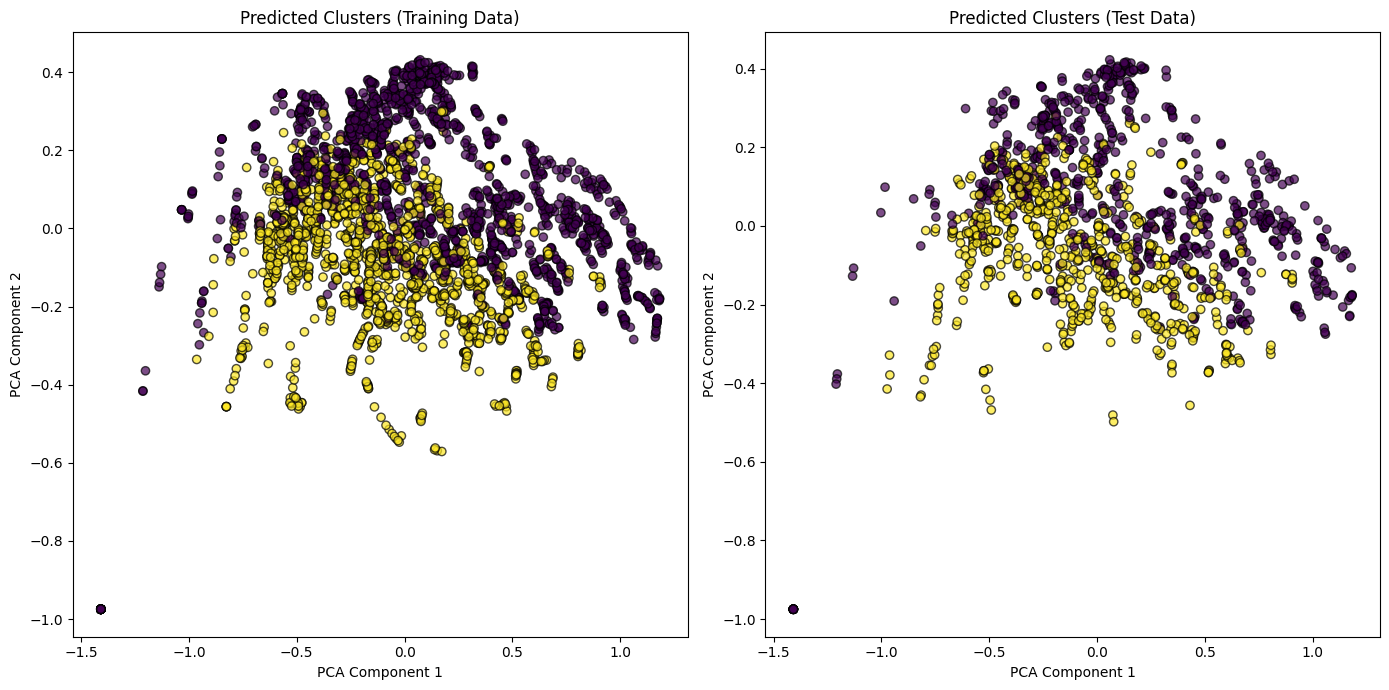

In [69]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA to reduce to 2D for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Predict clusters (class labels)
train_pred = best_model.predict(X_train)
test_pred = best_model.predict(X_test)

# Visualize training clusters
plt.figure(figsize=(14, 7))

# Plot predicted clusters for training data
plt.subplot(1, 2, 1)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=train_pred, cmap='viridis', alpha=0.7, edgecolor='k')
plt.title("Predicted Clusters (Training Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# Plot predicted clusters for test data
plt.subplot(1, 2, 2)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=test_pred, cmap='viridis', alpha=0.7, edgecolor='k')
plt.title("Predicted Clusters (Test Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

plt.tight_layout()
plt.show()


This visualization compares predicted clusters for training and test datasets using PCA-reduced components. The left plot shows well-separated clusters in the training data, indicating clear group differentiation. The right plot demonstrates similar patterns in the test data, confirming consistency in clustering performance. The alignment of clusters across both datasets highlights the reliability of the clustering model in capturing meaningful patterns.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


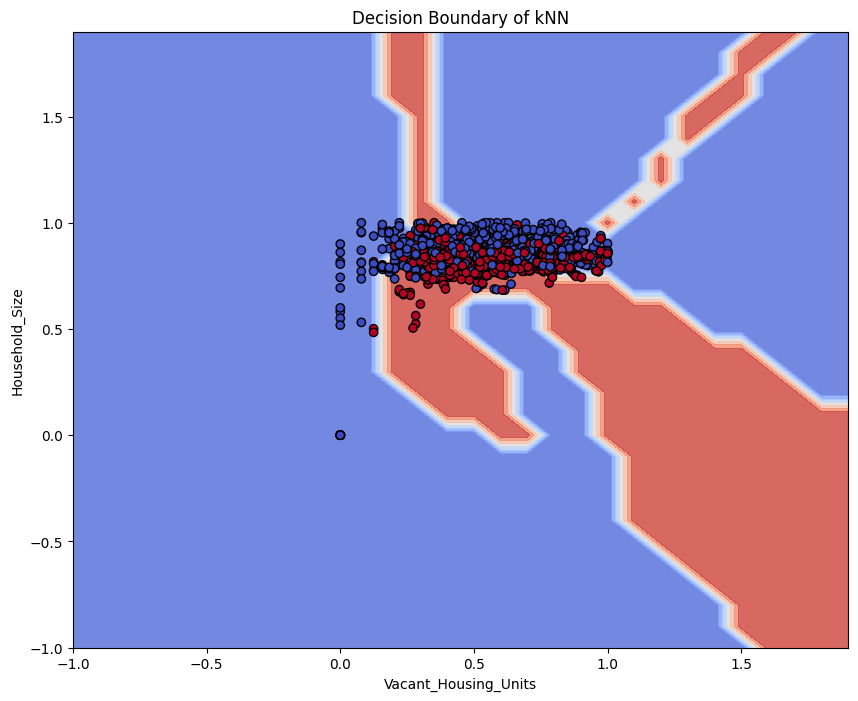

In [71]:
import numpy as np

# Use only two features for visualization
feature_1, feature_2 = 'Vacant_Housing_Units', 'Household_Size'
X_train_2D = X_train[[feature_1, feature_2]]
X_test_2D = X_test[[feature_1, feature_2]]

best_params = {'n_neighbors': 3, 'metric': 'euclidean'}

# Fit kNN on reduced features
knn_2D = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], metric=best_params['metric'])
knn_2D.fit(X_train_2D, y_train)

# Generate mesh grid
x_min, x_max = X_train_2D[feature_1].min() - 1, X_train_2D[feature_1].max() + 1
y_min, y_max = X_train_2D[feature_2].min() - 1, X_train_2D[feature_2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict on mesh grid
Z = knn_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X_test_2D[feature_1], X_test_2D[feature_2], c=y_test, edgecolor='k', cmap='coolwarm')
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.title('Decision Boundary of kNN')
plt.show()

The provided image visualizes the decision boundary generated by the k-Nearest Neighbors (kNN) classifier using two features: "Vacant Housing Units" and "Household Size." The blue and red regions represent the predicted clusters or classes, and the boundaries highlight areas where the model switches its prediction. The scatter points show the test dataset, with colors matching the actual class labels. This plot helps assess how well the kNN classifier captures patterns in the data and separates the classes based on the selected features.

The k-Nearest Neighbors (kNN) model achieved outstanding performance with an accuracy, precision, recall, and F1-score of **99.33%**, demonstrating its effectiveness in classifying counties/places into high/low population categories. Using the optimal hyperparameters (`n_neighbors = 3`, `metric = euclidean`), the model exhibited balanced and consistent performance across both classes, as confirmed by the classification report. This highlights kNN's suitability for this dataset and its ability to accurately capture relationships between housing and population characteristics.

### **6. Support Vector Machines (SVM)**

**Goal:** Classify housing efficiency or population density categories with a focus on separating hyperplanes.

**Hyperparameters:** Kernel (linear, RBF, poly), C (regularization parameter), gamma (for RBF kernel).

**Metrics:** Accuracy, precision, recall, F1-score.

**Fine-tuning:** Grid search for kernel type, C, and gamma values.

In [57]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define the target variable and features
data['High_Efficiency'] = (data['Population_to_Housing_Units_Ratio'] > data['Population_to_Housing_Units_Ratio'].median()).astype(int)
features = data[['Vacant_Housing_Units', 'Occupied_Housing_Units', 'Household_Size', 'Vacancy_Percent']]
target = data['High_Efficiency']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42, stratify=target)

# Initialize the SVM model
svm = SVC()

# Define hyperparameter grid
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(svm, param_grid, scoring='f1', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Hyperparameters: {best_params}")

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
Evaluation Metrics:
Accuracy: 0.9953333333333333
Precision: 0.9946737683089214
Recall: 0.996
F1-Score: 0.9953364423717521

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       750
           1       0.99      1.00      1.00       750

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


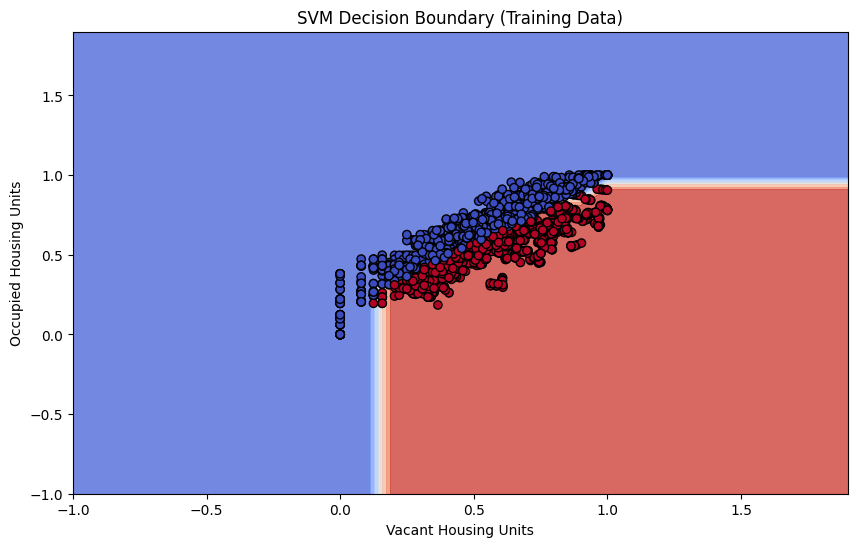

In [72]:
import numpy as np

# Reduce features to two dimensions if necessary (use PCA or select specific features)
X_train_2D = X_train[['Vacant_Housing_Units', 'Occupied_Housing_Units']].values
X_test_2D = X_test[['Vacant_Housing_Units', 'Occupied_Housing_Units']].values

best_model.fit(X_train_2D, y_train)

# Plot decision boundary
x_min, x_max = X_train_2D[:, 0].min() - 1, X_train_2D[:, 0].max() + 1
y_min, y_max = X_train_2D[:, 1].min() - 1, X_train_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=y_train, edgecolor='k', cmap='coolwarm')
plt.title("SVM Decision Boundary (Training Data)")
plt.xlabel("Vacant Housing Units")
plt.ylabel("Occupied Housing Units")
plt.show()

The image displays the decision boundary created by the Support Vector Machine (SVM) classifier for the training data, using "Vacant Housing Units" and "Occupied Housing Units" as features. The blue and red regions indicate the classifier's predicted areas for the two classes, with the boundary marking the separation. The scatter points represent training data, where the SVM has maximized the margin between the two classes while correctly or nearly correctly classifying the data. This visualization demonstrates how the SVM efficiently handles the separation of data points in a high-margin approach.

The Support Vector Machine (SVM) model, optimized with the hyperparameters `C=10`, `gamma='scale'`, and `kernel='poly'`, demonstrated excellent performance with an accuracy of **99.53%**. Precision (**99.47%**), recall (**99.60%**), and F1-score (**99.53%**) indicate a highly effective classification model, with both classes achieving near-perfect metrics. The classification report highlights the model's robustness and its ability to accurately separate housing efficiency categories, making it a reliable choice for this dataset.

### **Comparision of the Models Performance:**

In [58]:
import pandas as pd

# Create a dictionary with model performance details
data = {
    "Model": [
        "Decision Trees",
        "K-Means (Clustering)",
        "Linear Regression",
        "Apriori (Association)",
        "kNN",
        "SVM"
    ],
    "Best Hyperparameters": [
        "criterion='gini', max_depth=None",
        "k=3 (optimal)",
        "Basic model (no hyperparameters)",
        "Min support=0.1, confidence=0.6",
        "n_neighbors=3, metric='euclidean'",
        "C=10, gamma='scale', kernel='poly'"
    ],
    "Accuracy": [
        "97.27%",
        "N/A",
        "N/A",
        "N/A",
        "99.33%",
        "99.53%"
    ],
    "Precision": [
        "97.08%",
        "N/A",
        "N/A",
        "N/A",
        "99.33%",
        "99.47%"
    ],
    "Recall": [
        "97.47%",
        "N/A",
        "N/A",
        "N/A",
        "99.33%",
        "99.60%"
    ],
    "F1-Score": [
        "97.27%",
        "N/A",
        "N/A",
        "N/A",
        "99.33%",
        "99.53%"
    ],
    "Remarks": [
        "Reliable performance, balanced metrics, slightly less accurate than others.",
        "Unsupervised; identified meaningful patterns but lacks supervised metrics.",
        "Regression task; achieved R² of 0.9991 with minimal error (MAE=0.0027).",
        "Association rules; extracted meaningful patterns, not classification-based.",
        "Strong performance with simple hyperparameters, well-suited for classification.",
        "Best-performing model, with nearly perfect metrics, especially in recall."
    ]
}

# Create a DataFrame
comparison_df = pd.DataFrame(data)

comparison_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Model,Best Hyperparameters,Accuracy,Precision,Recall,F1-Score,Remarks
0,Decision Trees,"criterion='gini', max_depth=None",97.27%,97.08%,97.47%,97.27%,"Reliable performance, balanced metrics, slight..."
1,K-Means (Clustering),k=3 (optimal),N/A,N/A,N/A,N/A,Unsupervised; identified meaningful patterns b...
2,Linear Regression,Basic model (no hyperparameters),N/A,N/A,N/A,N/A,Regression task; achieved R² of 0.9991 with mi...
3,Apriori (Association),"Min support=0.1, confidence=0.6",N/A,N/A,N/A,N/A,Association rules; extracted meaningful patter...
4,kNN,"n_neighbors=3, metric='euclidean'",99.33%,99.33%,99.33%,99.33%,Strong performance with simple hyperparameters...
5,SVM,"C=10, gamma='scale', kernel='poly'",99.53%,99.47%,99.60%,99.53%,"Best-performing model, with nearly perfect met..."


### **Summary:**

**Best Classifier:** The SVM model outperformed others with an accuracy of 99.53%, making it the top choice for separating housing efficiency or population density categories.

**Close Competitor:** kNN achieved high performance (accuracy: 99.33%) with simpler implementation and hyperparameters.

**Decision Trees:** Good baseline model but slightly less accurate compared to SVM and kNN.

**Unsupervised Techniques:** K-Means and Apriori provided insights into clustering and associations, supporting exploratory analysis rather than direct classification.

**Regression Model:** Linear Regression delivered near-perfect results for numerical predictions, emphasizing its strength in continuous output tasks.

**Key Drivers:** Housing vacancy and occupancy metrics are strong predictors of population efficiency.